# Movie Recommender System

### Part 1 Exploratory data analysis (EDA)

***Exploratory data analysis (EDA)*** is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

### 1.1 Understand the Dataset

- In this section, dataset will be load using pandas lib
- Display the first few rows of each dataset (ratings, movies, tags, etc.) to understand the structure.
- Check the data types of each column.

##### MovieLens "ml-latest-small" Dataset

- **Size**: Approximately 1 MB
- **Content**: 100,000 ratings, 3,600 tag applications for 9,000 movies by 600 users
- **Last updated**: September 2018

This dataset is a subset of the MovieLens dataset and contains movie ratings, tag applications, and user information. It is suitable for educational purposes and prototyping.

**link:** https://grouplens.org/datasets/movielens/ [click me](https://grouplens.org/datasets/movielens/)

In [1]:
import pandas as pd

# Load the datasets
links = pd.read_csv('ml-latest-small/links.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

# Display the first few rows of each dataset and their info
datasets = {
    "Links": links,
    "Movies": movies,
    "Ratings": ratings,
    "Tags": tags
}

dataset_info = {}
for name, dataset in datasets.items():
    dataset_info[name] = {
        "First 5 Rows": dataset.head(),
        "Info": dataset.info()
    }

dataset_info["Movies"]["First 5 Rows"], dataset_info["Ratings"]["First 5 Rows"], dataset_info["Tags"]["First 5 Rows"], dataset_info["Links"]["First 5 Rows"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  fl

(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
    userId  movieId              tag   timestamp
 0       2    60756            funny  1445714994
 1       2    60756  Highly quotable  1445714996
 2       

**Links:**
Contains mapping of movieId to its corresponding **imdbId** and **tmdbId**.

**Movies:**
Contains **movieId**, the **title** of the movie, and its **genres**.

**Ratings:**
Contains ratings given by users to movies. Each row represents a **userId**, **movieId**, the given **rating**, and a **timestamp**.

**Tags:**
Contains tags given by users to movies. Each row represents a **userId**, **movieId**, the given **tag**, and a **timestamp**.

### 1.2 Check Missing Data
In this section:
- Check for any missing values in the dataset.

In [4]:
# Check for missing values in each dataset
missing_data = {}
for name, dataset in datasets.items():
    missing_data[name] = dataset.isnull().sum()

missing_data

{'Links': movieId    0
 imdbId     0
 tmdbId     8
 dtype: int64,
 'Movies': movieId    0
 title      0
 genres     0
 dtype: int64,
 'Ratings': userId       0
 movieId      0
 rating       0
 timestamp    0
 dtype: int64,
 'Tags': userId       0
 movieId      0
 tag          0
 timestamp    0
 dtype: int64}

We observe that:

The **Links** dataset has 8 missing values in the **tmdbId** column.
There are **no missing values** in the other datasets (**Movies, Ratings, and Tags**).

For this analysis, let's focus on the most important datasets: **Movies** and **Ratings**. In this case, we can fill the missing tmdbId values with a placeholder (e.g., -1) or simply ignore them since they might not be crucial for the recommendation system.

### 1.3 Descriptive Statistics
In this section:
- Get the summary statistics for numerical columns (like mean, median, standard deviation).
- Check the number of unique movies and users.

In [5]:
# Summary statistics for the Ratings dataset
ratings_summary = ratings['rating'].describe()

# Number of unique movies and users
unique_movies = ratings['movieId'].nunique()
unique_users = ratings['userId'].nunique()

ratings_summary, unique_movies, unique_users


(count    100836.000000
 mean          3.501557
 std           1.042529
 min           0.500000
 25%           3.000000
 50%           3.500000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64,
 9724,
 610)

From the summary statistics for the **Ratings** dataset:

- There are a total of 100,836 ratings.
- The average rating is approximately 3.50.
- The ratings range from 0.5 to 5, with a median of 3.5.
- 25% of the ratings are 3 or below, while 75% are 4 or below.

We also have:
- 9,724 unique movies.
- 610 unique users.

### 1.4 Visualize the Data
In this section:
- We will show histograms of ratings to see their distribution.
- Number of ratings per movie or per user.

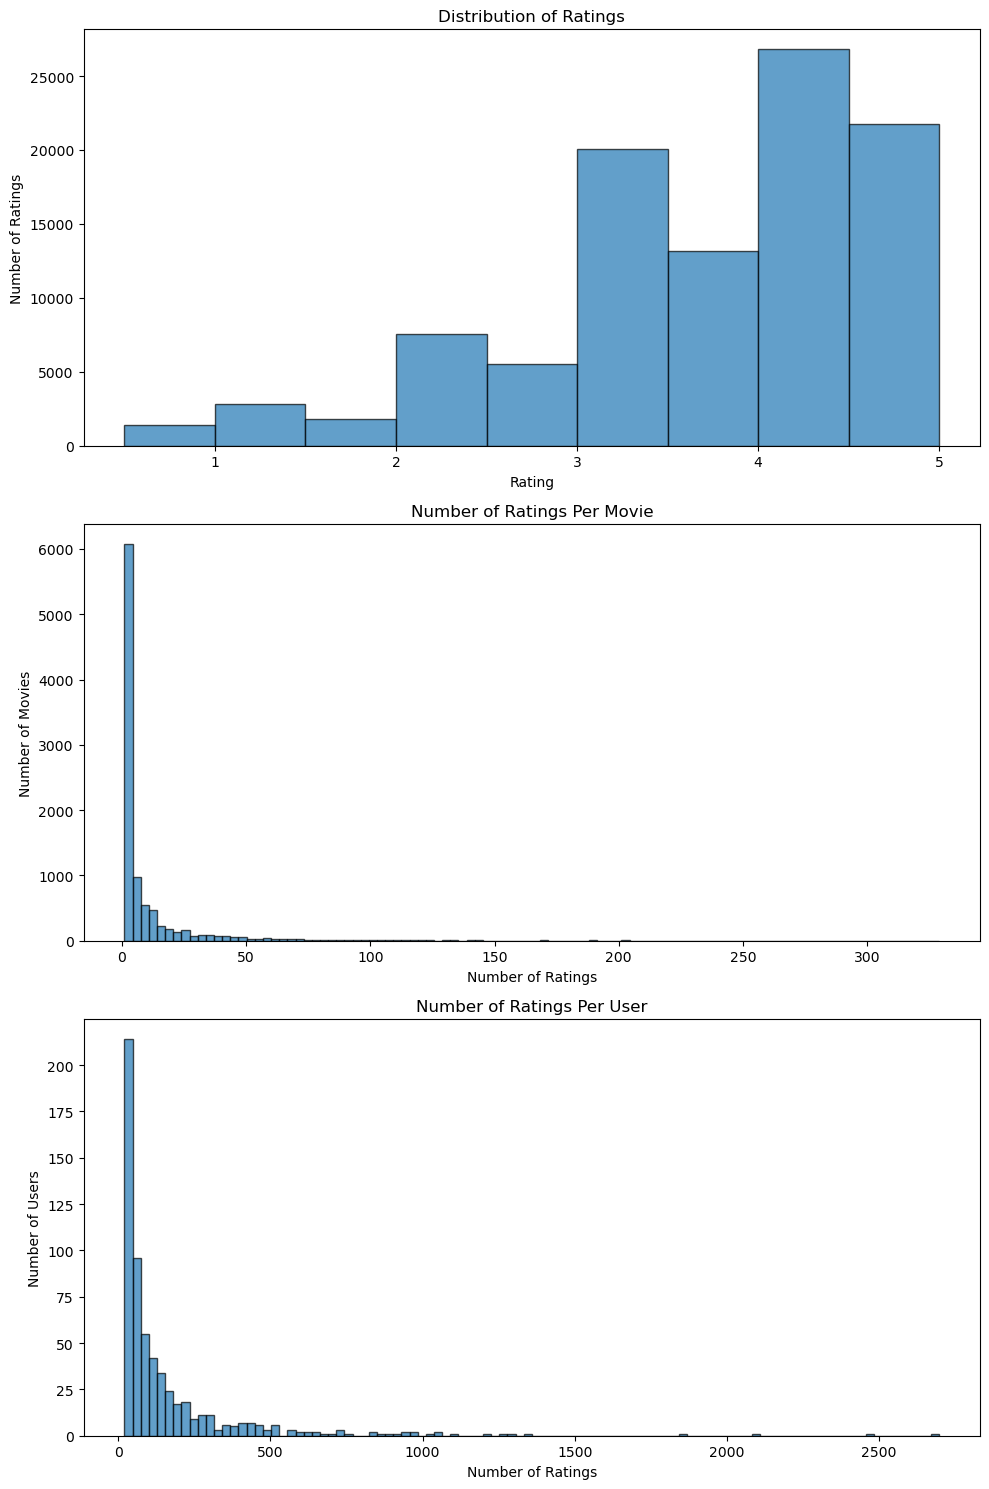

In [6]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot histogram of ratings
ax[0].hist(ratings['rating'], bins=9, edgecolor='black', alpha=0.7)
ax[0].set_title("Distribution of Ratings")
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Number of Ratings")

# Plot number of ratings per movie
ratings_per_movie = ratings.groupby('movieId').size()
ax[1].hist(ratings_per_movie, bins=100, edgecolor='black', alpha=0.7)
ax[1].set_title("Number of Ratings Per Movie")
ax[1].set_xlabel("Number of Ratings")
ax[1].set_ylabel("Number of Movies")

# Plot number of ratings per user
ratings_per_user = ratings.groupby('userId').size()
ax[2].hist(ratings_per_user, bins=100, edgecolor='black', alpha=0.7)
ax[2].set_title("Number of Ratings Per User")
ax[2].set_xlabel("Number of Ratings")
ax[2].set_ylabel("Number of Users")

# Adjust layout
plt.tight_layout()
plt.show()


From the visualizations:

**Distribution of Ratings**:
Ratings are concentrated around 3.0 to 4.0, with fewer ratings at the extreme low (0.5) and high (5.0) ends.

**Number of Ratings Per Movie**:
Most movies have received only a few ratings, which implies there are many movies in the dataset that might not be very popular or well-known.

**Number of Ratings Per User**:
Most users have given only a few ratings, but there are also users who have given a large number of ratings.

### 1.5 Feature Engineering
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling

In this section:
- Extract genres from the movies dataset. Since a movie can have multiple genres, you may want to create a binary representation for each genre.
- Extract year from the movie title (if you think it might be useful).

In [174]:
# Split the genres and create a binary representation for each genre
genres_dummies = movies['genres'].str.get_dummies(sep='|')

# Add the movieId to the genres dataframe
genres_dummies['movieId'] = movies['movieId']

# Preview the first few rows
genres_dummies.head()


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movieId
0,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


Each row corresponds to a movie, and the columns represent the various genres. A value of 1 indicates that the movie belongs to that genre, while a value of 0 indicates the opposite.

In [56]:
# Extract year from the title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)$', expand=True)

# Preview the changes
movies.head()


,movieId,title,genres,year,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1990.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,1990.0
4,5,Father of the Bride Part II (1995),Comedy,1995,1990.0


Next, let's extract the year from the movie title. The year is typically enclosed in parentheses at the end of the title. We'll extract this and create a new column for the year.

### 1.6 Outlier Detection
In this section:
- Check for any outliers in the ratings and other numerical columns.

For the Ratings dataset, we'll look for outliers in the rating column, even though the nature of ratings (bounded between 0.5 and 5) limits extreme outliers. However, it's still useful to see if there are any unexpected values.

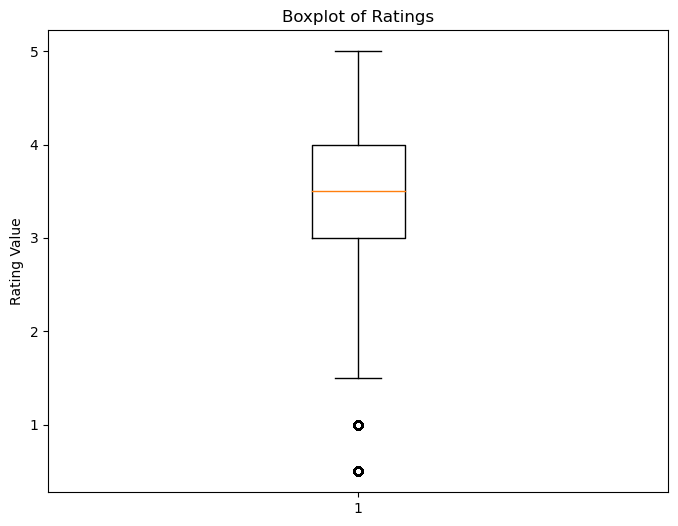

In [9]:
# Boxplot to check for outliers in the rating column
plt.figure(figsize=(8, 6))
plt.boxplot(ratings['rating'])
plt.title("Boxplot of Ratings")
plt.ylabel("Rating Value")
plt.show()


The boxplot shows that the ratings are mostly concentrated around the median (3.5), with no extreme outliers. This is expected since ratings are bounded between 0.5 and 5.

### 1.7 Understand Relationships
In this section:
- Check the average rating for each movie and see its distribution.
- Investigate if there's a relationship between the number of ratings a movie gets and its average rating.

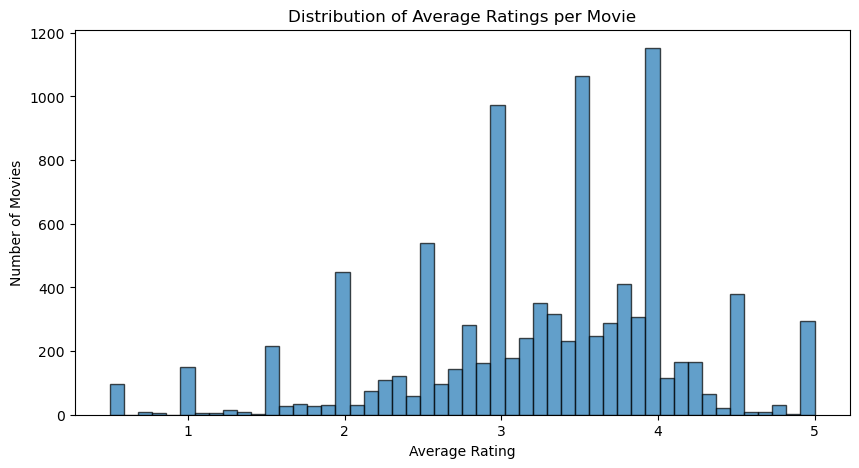

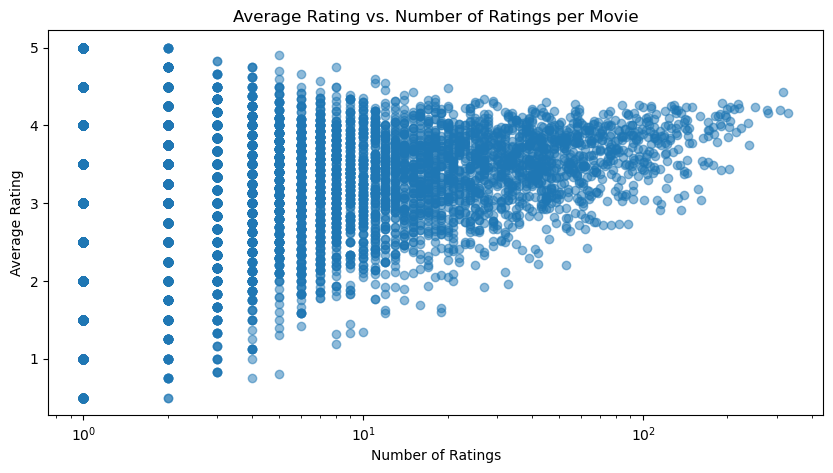

In [10]:
# Calculate average rating for each movie
average_ratings = ratings.groupby('movieId')['rating'].mean()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 5))
plt.hist(average_ratings, bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribution of Average Ratings per Movie")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()

# Relationship between number of ratings a movie gets and its average rating
movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']}).reset_index()
movie_stats.columns = ['movieId', 'mean_rating', 'num_ratings']

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(movie_stats['num_ratings'], movie_stats['mean_rating'], alpha=0.5)
plt.title("Average Rating vs. Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.xscale('log')
plt.show()


From the visualizations:

**Distribution of Average Ratings per Movie**:
Most movies have an average rating around 3.5 to 4.0. There's a wider distribution for movies with very few ratings since a single rating can heavily influence the average.

**Average Rating vs. Number of Ratings per Movie**:
There seems to be a slight trend where movies with more ratings (popular movies) tend to have a higher average rating. This might be due to the fact that popular movies are generally well-received by the audience.

### 1.8 Diversity in Data
In this section:
- Explore the distribution of genres: Which are the most common genres? Which are rare?

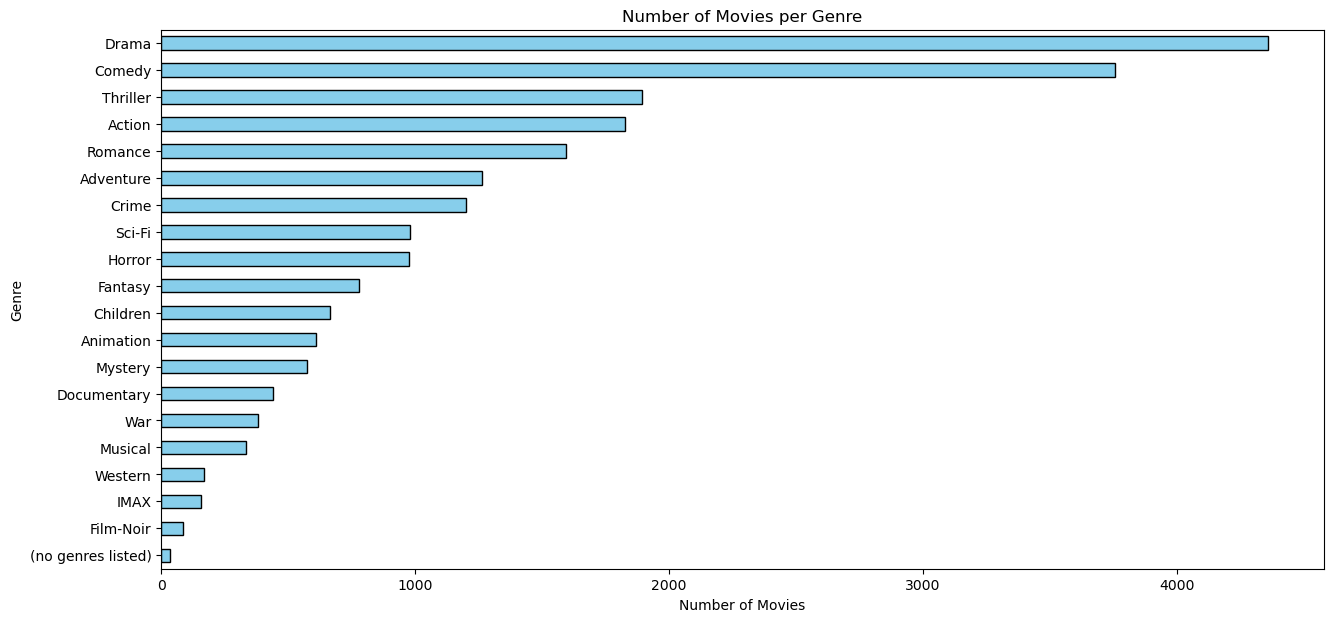

In [11]:
# Calculate the sum for each genre
genre_sum = genres_dummies.drop('movieId', axis=1).sum()

# Plot the distribution of genres
plt.figure(figsize=(15, 7))
genre_sum.sort_values().plot(kind='barh', edgecolor='black', color='skyblue')
plt.title("Number of Movies per Genre")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


From the visualization:

**Number of Movies per Genre:**

- The most common genres are **Drama, Comedy, Thriller,** and **Action**.
- Some genres like Film-Noir, IMAX, and (no genres listed) have a lower representation in the dataset.

### 1.9 User Patterns
In this section:
- We will check the distribution of the number of ratings given by each user
- The average rating given by each user

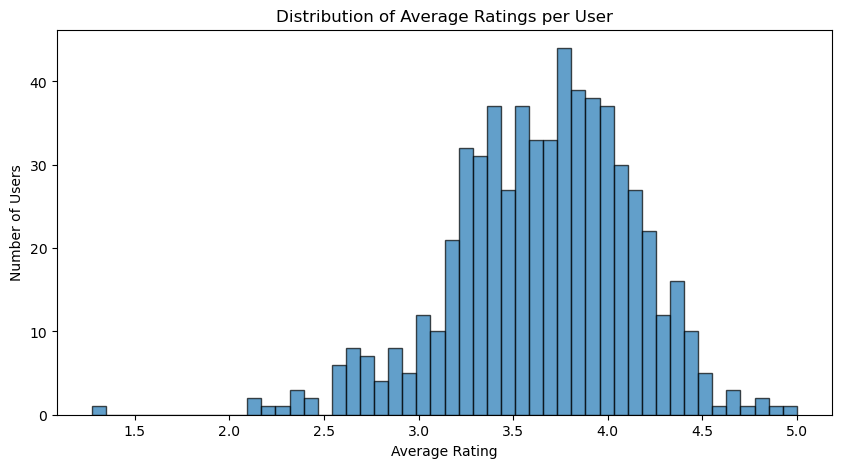

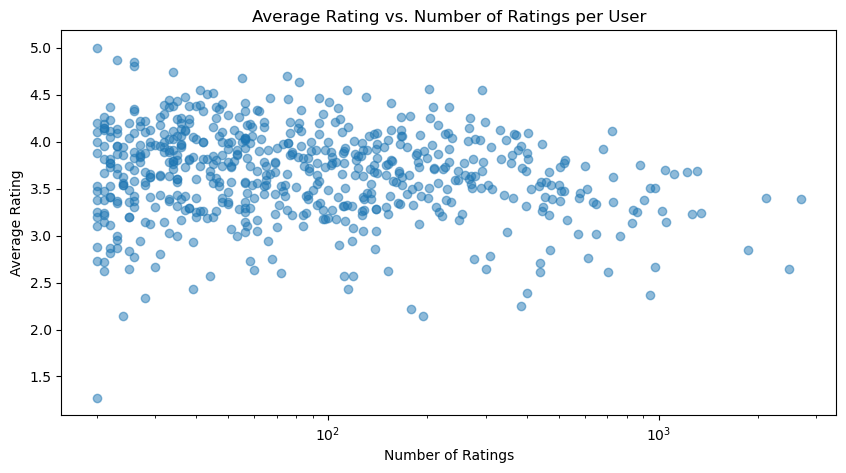

In [12]:
# Calculate average rating given by each user
average_user_ratings = ratings.groupby('userId')['rating'].mean()

# Plot the distribution of average user ratings
plt.figure(figsize=(10, 5))
plt.hist(average_user_ratings, bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribution of Average Ratings per User")
plt.xlabel("Average Rating")
plt.ylabel("Number of Users")
plt.show()

# Scatter plot for user patterns
user_stats = ratings.groupby('userId').agg({'rating': ['mean', 'count']}).reset_index()
user_stats.columns = ['userId', 'mean_rating', 'num_ratings']

plt.figure(figsize=(10, 5))
plt.scatter(user_stats['num_ratings'], user_stats['mean_rating'], alpha=0.5)
plt.title("Average Rating vs. Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.xscale('log')
plt.show()


From the visualizations:

**Distribution of Average Ratings per User:**
- Most users have an average rating around 3.5 to 4.0. However, there are users with a broader range of average ratings, which could be influenced by the fewer number of ratings they've given.

**Average Rating vs. Number of Ratings per User:**
- There doesn't seem to be a strong trend between the number of ratings a user gives and their average rating.
- However, users who rate a lot of movies tend to have their average ratings centered around 3.5 to 4.0.

### 1.10 Potential Challenges

One of the challenges in recommendation systems is dealing with movies or users with very few interactions, known as the **cold start** problem.

***Cold Start***
The cold start problem in recommender systems refers to a scenario where the system struggles to provide accurate recommendations due to insufficient data about either the products or users, similar to a car having trouble starting in cold weather until it reaches optimal conditions (Milankovich, 2015).

In this section:
- We will identify movies with very few ratings
- Users with very few ratings given


In [13]:
# Movies with very few ratings
movies_few_ratings = movie_stats[movie_stats['num_ratings'] <= 2]

# Users with very few ratings given
users_few_ratings = user_stats[user_stats['num_ratings'] <= 2]

len(movies_few_ratings), len(users_few_ratings)


(4744, 0)

From the analysis:

- There are 4,744 movies with 2 or fewer ratings. This is a significant number and can pose a challenge for the recommendation system. Recommending these movies can be tricky since there's limited user interaction data available for them.

- No users have given 2 or fewer ratings. This is good news as it reduces the cold start problem for new users.

### 1.11 Tags and Text Data Analysis
In this section:
- We will explore the tags dataset
- Check the most common tags
- Check the number of unique tags and their frequency

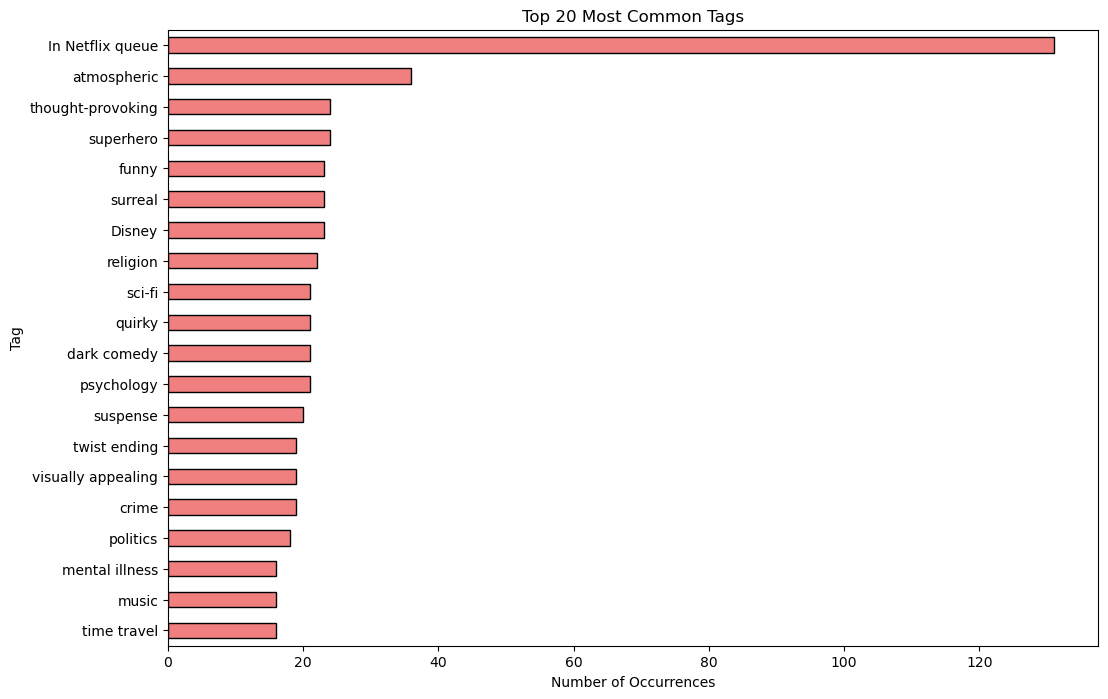

1589

In [14]:
# Most common tags
tag_counts = tags['tag'].value_counts()

# Top 20 most common tags
top_tags = tag_counts.head(20)

# Number of unique tags
num_unique_tags = tags['tag'].nunique()

# Plot the most common tags
plt.figure(figsize=(12, 8))
top_tags.plot(kind='barh', edgecolor='black', color='lightcoral')
plt.title("Top 20 Most Common Tags")
plt.xlabel("Number of Occurrences")
plt.ylabel("Tag")
plt.gca().invert_yaxis()  # To display the most common tag at the top
plt.show()

num_unique_tags


From the tags analysis:

- The most common tags include descriptors like "In Netflix queue", "atmospheric", "thought-provoking", and specific genre indications like "superhero".
- There are a total of 1,589 unique tags.

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/genres_distribution.png'

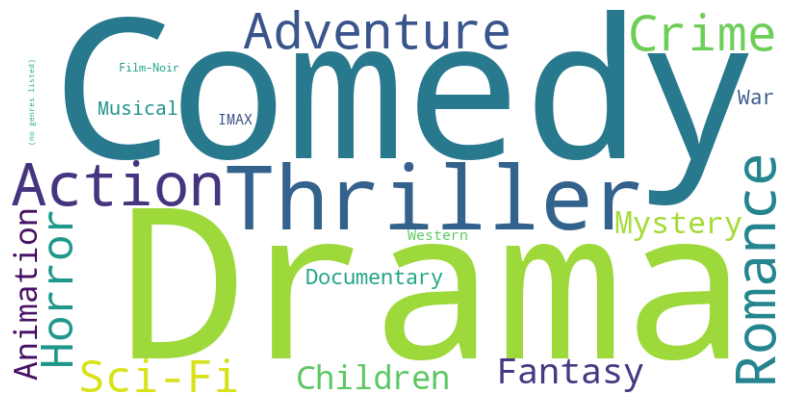

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Movies Analysis
# Extracting and preparing genres data for analysis
movies_df = movies
ratings_df = ratings
movies_df['genres'] = movies_df['genres'].str.replace('|', ', ')
all_genres = ', '.join(movies_df['genres']).split(', ')
genres_series = pd.Series(all_genres)

# Getting the distribution of movies across different genres
genres_distribution = genres_series.value_counts()

# Plotting the distribution of movies across different genres as a word cloud
plt.figure(figsize=(8, 6))
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(genres_distribution)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('/mnt/data/genres_distribution.png')
plt.show()

# Getting the top 10 rated movies
top_rated_movies = ratings_df.groupby('movieId')['rating'].mean().reset_index()
top_rated_movies = top_rated_movies.merge(movies_df, on='movieId', how='left')
top_rated_movies = top_rated_movies[top_rated_movies['rating'] == 5.0]

# Getting the top 10 rated movies with the highest number of ratings
top_10_rated_movies = top_rated_movies.groupby('movieId')['rating'].count().reset_index()
top_10_rated_movies = top_10_rated_movies.merge(movies_df, on='movieId', how='left')
top_10_rated_movies = top_10_rated_movies.sort_values(by='rating', ascending=False).head(10)

movies_analysis = {
    "Top 10 rated movies": top_10_rated_movies[['title', 'genres', 'rating']].to_dict('records')
}

movies_analysis

Top 10 Rated Movies: Here are the top 10 movies that received a perfect rating (5.0) by at least one user:

"Lamerica (1994)" - Genres: Adventure, Drama
"Seve (2014)" - Genres: Documentary, Drama
"The Jinx: The Life and Deaths of Robert Durst (2015)" - Genre: Documentary
"Willy/Milly (1986)" - Genres: Comedy, Fantasy
"What Men Talk About (2010)" - Genre: Comedy
"Tom and Jerry: A Nutcracker Tale (2007)" - Genres: Animation, Comedy
"Saving Santa (2013)" - Genres: Animation, Children, Comedy
"Love and Pigeons (1985)" - Genres: Comedy, Romance
"George Carlin: Life Is Worth Losing (2005)" - Genre: Comedy
"George Carlin: It's Bad for Ya! (2008)" - Genre: Comedy

As we can see, these top rated movies' genre are mainly consist of "Drama", "Comedy", followed by Thriller, Adventure.

### 1.12 Correlation Analysis
In this section:
- We will need to find out is there any correlation between movie features, such as the number of ratings a movie has and its average rating
- Compute the correlation coefficient for these features

# Compute the correlation for movie features
correlation_matrix = movie_stats[['mean_rating', 'num_ratings']].corr()

correlation_matrix


From the correlation analysis:

- There's a positive correlation (approximately 0.127) between the average rating of a movie and the number of ratings it has received.
- This suggests that movies with more ratings tend to have slightly higher average ratings, although the correlation is not very strong.

### Part 2 Data Pre-processing

**Data preprocessing**, encompassing the identification and rectification or removal of erroneous records within a dataset, involves the enhancement of data quality by detecting and addressing inaccuracies, incompleteness, or irrelevant data segments (Samuel, Asogbon, Sangaiah, & Li, 2018).

Here are the several step we can do in this part:
- **Handle Missing Data:** From our EDA, we identified missing tmdbId values in the Links dataset.
- **Encoding Categorical Data:** We already converted genres into binary columns.
- **Timestamps:** Convert timestamps into a readable format, which might help in time-based recommendations.
- **Scaling:** Scaling might be needed if using algorithms sensitive to feature magnitude.

### 2.1 Handle Missing Value

From our EDA, we identified missing tmdbId values in the Links dataset. Now, we will simply replace the missing value with -1 since it might not crucial for the recommendation system

In [5]:
links['tmdbId'].fillna(-1, inplace=True)
missing_values_after_replacement = links.isnull().sum()
missing_values_after_replacement

movieId    0
imdbId     0
tmdbId     0
dtype: int64

### 2.2 Convert Timestamps

Convert timestamps into a readable format, which might help in time-based recommendations (if applicable).

In [6]:
# Convert timestamps in ratings and tags to a readable date format. This might help in time-based recommendations.
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

# Preview the changes
ratings.head(), tags.head()

(   userId  movieId  rating           timestamp
 0       1        1     4.0 2000-07-30 18:45:03
 1       1        3     4.0 2000-07-30 18:20:47
 2       1        6     4.0 2000-07-30 18:37:04
 3       1       47     5.0 2000-07-30 19:03:35
 4       1       50     5.0 2000-07-30 18:48:51,
    userId  movieId              tag           timestamp
 0       2    60756            funny 2015-10-24 19:29:54
 1       2    60756  Highly quotable 2015-10-24 19:29:56
 2       2    60756     will ferrell 2015-10-24 19:29:52
 3       2    89774     Boxing story 2015-10-24 19:33:27
 4       2    89774              MMA 2015-10-24 19:33:20)

### Part 3 Feature Engineering

Feature engineering, encompassing the selection, manipulation, and transformation of raw data into meaningful features in order to enhance machine learning model performance (Patel, 2023).

### 3.1 Creating User Profiles
In this section:
- Calculate the average rating given by each user.
- Calculate the total number of ratings given by each user.
- Determine the user's favorite genres based on their ratings.

In [7]:
# Average rating given by each user
user_avg_rating = ratings.groupby('userId')['rating'].mean()

# Total number of ratings given by each user
user_num_ratings = ratings.groupby('userId').size()

# Creating dataframes for user and movie profiles
user_profiles = pd.DataFrame({
    "avg_rating": user_avg_rating,
    "num_ratings": user_num_ratings
})

### 3.2 Creating Movie Profiles

- Calculate the average rating for each movie.
- Calculate the total number of ratings each movie has received.
- Extract the year from the movie title (already done in the EDA).
- Create a binary representation for each genre (already done in the EDA).

In [8]:
# Average rating for each movie
movie_avg_rating = ratings.groupby('movieId')['rating'].mean()

# Total number of ratings each movie received
movie_num_ratings = ratings.groupby('movieId').size()

# Number of tags for each movie
movie_num_tags = tags.groupby('movieId').size()

# Most common tag for each movie
most_common_tags = tags.groupby('movieId')['tag'].apply(lambda x: x.mode().iloc[0])

movie_profiles = pd.DataFrame({
    "avg_rating": movie_avg_rating,
    "num_ratings": movie_num_ratings,
    "num_tags": movie_num_tags,
    "most_common_tag": most_common_tags
})

In [9]:
user_profiles.head(), movie_profiles.head()

(        avg_rating  num_ratings
 userId                         
 1         4.366379          232
 2         3.948276           29
 3         2.435897           39
 4         3.555556          216
 5         3.636364           44,
          avg_rating  num_ratings  num_tags most_common_tag
 movieId                                                   
 1          3.920930        215.0       3.0           pixar
 2          3.431818        110.0       4.0  Robin Williams
 3          3.259615         52.0       2.0           moldy
 4          2.357143          7.0       NaN             NaN
 5          3.071429         49.0       2.0       pregnancy)

The feature engineering steps have been successfully completed:

User Profiles:
- ***avg_rating:*** Represents the average rating given by each user.
- ***num_ratings:*** Represents the total number of ratings given by each user.

Movie Profiles:
- ***avg_rating:*** Represents the average rating of each movie.
- ***num_ratings:*** Represents the total number of ratings each movie has received.
- ***num_tags:*** Represents the total number of tags each movie has.
- ***most_common_tag:*** Represents the most frequently used tag for each movie.


**Justification**
- Creating user and movie profiles allows us to capture key attributes that can be useful when building the recommendation system.
- The avg_rating for both users and movies helps in understanding general preferences and the overall reception of movies.
- The num_ratings for users can help in understanding how active a user is, which can be useful for cold start problems. For movies, it provides an idea about the movie's popularity.
- Tags are useful for content-based filtering. The most_common_tag can provide insights into the main theme or feature of the movie.

### Part 4 Model Selection and Training

Depending on the type of recommendation system (collaborative filtering, content-based, hybrid), different algorithms or models are chosen and trained.

### 4.1 Content-based Filtering
Content-based filtering is a recommendation system technique that suggests items to users based on the properties and characteristics of the items themselves and the user's historical preferences.

For example, if you liked a movie that is a comedy and has a certain actor, you might also like other movies that are comedies and have the same actor.

### 4.1.1 Genre-Based Recommender

A Genre-Based Recommender is a movie recommendation system that suggests films to users based on their preferred movie genres. It analyzes user preferences for specific genres, such as action, romance, or comedy, and recommends movies within those genres to match the user's tastes.

In this section:
- Create a movie profile using only genres.
- Compute the similarity between movies based on their genres.
- Recommend movies with the highest similarity.

In [253]:
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel

# Compute cosine similarity for genres
cosine_sim_genres = linear_kernel(genres_dummies.drop('movieId', axis=1), genres_dummies.drop('movieId', axis=1))

def genre_based_scores(user):
    rated_movies = ratings[ratings['userId'] == user]

    # Map movie IDs to indices
    rated_indices = rated_movies['movieId'].apply(lambda x: genres_dummies[genres_dummies['movieId'] == x].index[0])

    # Calculate predicted scores for all movies based on genre similarity
    predicted_scores = cosine_sim_genres[rated_indices].mean(axis=0)

    scores_series = pd.Series(predicted_scores, index=genres_dummies['movieId'])

    return scores_series

In [218]:
def get_movie_recommendations(user, recommender_function, n=10):
    """
    Get top-n movie recommendations for a given user using the specified recommender function.

    Parameters:
    - user: The user ID
    - recommender_function: The recommender function that returns scores for movies
    - n: Number of top recommendations to return (default is 10)

    Returns:
    - DataFrame with columns: movieId, title, score, sorted by score in descending order
    """
    # Get the scores for all movies using the recommender
    scores = recommender_function(user)

    # Sort movies based on the scores and take top n
    sorted_scores = scores.sort_values(ascending=False).head(n)

    # Convert movie IDs to movie names
    recommended_movies_df = movies[movies['movieId'].isin(sorted_scores.index)][['movieId', 'title']]
    recommended_movies_df['score'] = recommended_movies_df['movieId'].map(sorted_scores.to_dict())

    # Sort the DataFrame by score in descending order
    recommended_movies_df = recommended_movies_df.sort_values(by='score', ascending=False)

    return recommended_movies_df

In [254]:
get_movie_recommendations(1, genre_based_scores)

,movieId,title,score
7441,81132,Rubber (2010),2.021552
8597,117646,Dragonheart 2: A New Beginning (2000),1.844828
7170,71999,Aelita: The Queen of Mars (Aelita) (1924),1.771552
3608,4956,"Stunt Man, The (1980)",1.754310
9394,164226,Maximum Ride (2016),1.724138
3460,4719,Osmosis Jones (2001),1.706897
4631,6902,Interstate 60 (2002),1.706897
6462,52462,Aqua Teen Hunger Force Colon Movie Film for Th...,1.689655
478,546,Super Mario Bros. (1993),1.668103
5774,31367,"Chase, The (1994)",1.655172


### 4.1.2  Weighted Genre-Based Recommender
In weighted genre-based recommender, we consider the weighted similarity which means for each movie the user has rated, we compute its similarity with all other movies. This similarity is then multiplied (weighted) by the rating the user gave to the movie. The intuition is to give more importance to the preferences indicated by higher ratings.

In this section:
- For each movie the user has rated, compute its similarity with all other movies.
- Weight this similarity by the rating the user gave to the movie.
- Aggregate these weighted similarities to compute a final recommendation score.
- Recommend the movies with the highest aggregated scores.

In [221]:
def weighted_genre_based_scores(user):
    # Movies rated by the user with their ratings
    user_ratings = ratings[ratings['userId'] == user]
    rated_movies = user_ratings['movieId'].tolist()
    movie_ratings = user_ratings.set_index('movieId')['rating'].to_dict()

    # Map movie IDs to indices
    rated_indices = [genres_dummies.index[genres_dummies['movieId'] == movie].tolist()[0] for movie in rated_movies]

    # Weighted similarity: Initialize with zeros
    weighted_scores = np.zeros(cosine_sim_genres.shape[0])

    # For each rated movie, add its similarity weighted by the user's rating for that movie
    for idx, movie in zip(rated_indices, rated_movies):
        weighted_scores += cosine_sim_genres[idx] * movie_ratings[movie]

    # Normalize the scores
    weighted_scores /= len(rated_movies)

    # Convert scores to a pandas Series
    movie_scores = pd.Series(weighted_scores, index=genres_dummies['movieId'])

    return movie_scores

In [222]:
get_movie_recommendations(1,weighted_genre_based_scores)

,movieId,title,score
7441,81132,Rubber (2010),8.698276
8597,117646,Dragonheart 2: A New Beginning (2000),7.995690
7170,71999,Aelita: The Queen of Mars (Aelita) (1924),7.676724
3608,4956,"Stunt Man, The (1980)",7.607759
3460,4719,Osmosis Jones (2001),7.431034
9394,164226,Maximum Ride (2016),7.396552
4631,6902,Interstate 60 (2002),7.370690
6462,52462,Aqua Teen Hunger Force Colon Movie Film for Th...,7.323276
478,546,Super Mario Bros. (1993),7.237069
6570,55116,"Hunting Party, The (2007)",7.125000


### Comparison: Basic Genre-Based vs. Weighted Genre-Based Recommenders

#### 1. Basic Genre-Based Recommender (`genre_based_scores`):

- **Similarity Calculation**:
  - For each movie the user has rated, it computes its similarity with all other movies based on their genres.

- **Aggregation**:
  - For each unrated movie, the system aggregates (sums up) these similarities to compute a recommendation score.

- **Final Score**:
  - The final score for an unrated movie is essentially the average similarity of that movie to all movies the user has rated.

- **Assumption**:
  - It assumes equal importance for all movies the user has rated, regardless of the rating value.

#### 2. Weighted Genre-Based Recommender (`weighted_genre_based_scores`):

- **Similarity Calculation**:
  - For each movie the user has rated, it computes its similarity with all other movies based on their genres.

- **Weighting**:
  - Before aggregation, the similarity score is weighted (multiplied) by the rating the user gave to the movie. This means if a user rated a movie with 5 stars, its similarity scores with other movies are given 5 times more importance than if it was rated with just 1 star.

- **Aggregation**:
  - For each unrated movie, the system aggregates (sums up) these weighted similarities to compute a recommendation score.

- **Normalization**:
  - The final score is then divided by the number of movies the user has rated to get an average weighted score.

- **Assumption**:
  - Movies that the user rated higher are given more importance in the recommendation process.


The `weighted_genre_based_scores` function provides more refined recommendations because it takes into account not just which movies the user has rated, but also how highly they rated them. This means it will prioritize movies similar to those the user likes (gave higher ratings to) over movies similar to those the user feels neutral or negative about.

### 4.1.3 Year-based Recommenders
Similar to genre-based recommender, the Year-Based Recommender is a movie recommendation system that tailors movie suggestions to a user's historical preferences based on the decade in which they've rated movies. It analyzes a user's past ratings and recommends movies from the same decade, allowing users to explore films from their preferred time periods.

In this section:
- Create a movie profile using only the year (or decade).
- Compute the similarity between movies based on their release year (or decade).
- Recommend movies with the highest similarity.

In [227]:
# Convert years to decades
movies['decade'] = (movies['year'].astype(float) // 10) * 10

# One-hot encode the decades
decades_dummies = pd.get_dummies(movies['decade'])
decades_dummies['movieId'] = movies['movieId']

# Compute cosine similarity for decades
cosine_sim_decades = linear_kernel(decades_dummies.drop('movieId', axis=1), decades_dummies.drop('movieId', axis=1))

def year_based_scores(user):
    # Movies rated by the user
    rated_movies = ratings[ratings['userId'] == user]['movieId'].tolist()

    # Map movie IDs to indices
    rated_indices = [decades_dummies.index[decades_dummies['movieId'] == movie].tolist()[0] for movie in rated_movies]

    # Calculate predicted scores for all movies based on decade similarity
    predicted_scores = np.sum(cosine_sim_decades[rated_indices], axis=0) / len(rated_indices)

    return pd.Series(predicted_scores, index=decades_dummies['movieId'])

In [230]:
get_movie_recommendations(1,year_based_scores)

,movieId,title,score
0,1,Toy Story (1995),0.491379
2029,2701,Wild Wild West (1999),0.491379
2030,2702,Summer of Sam (1999),0.491379
2031,2706,American Pie (1999),0.491379
2032,2707,Arlington Road (1999),0.491379
2033,2708,"Autumn Tale, An (Conte d'automne) (1998)",0.491379
2034,2709,Muppets From Space (1999),0.491379
2035,2710,"Blair Witch Project, The (1999)",0.491379
2036,2712,Eyes Wide Shut (1999),0.491379
2037,2713,Lake Placid (1999),0.491379


### 4.1.4 Weighted Year-based Recommenders

For a weighted year-based recommender, the logic remains largely the same as the weighted genre-based recommender, with the difference being the feature on which the similarity is calculated. Instead of using genres, we would be using the movie's release year (or decade) for the similarity calculation.

In this section:
- For each movie the user has rated, compute its similarity with all other movies based on their release years.
- Weight the similarity by the rating the user gave to the movie.
- Aggregate these weighted similarities to compute a final recommendation score.
- Recommend the movies with the highest aggregated scores.

In [232]:
def weighted_year_based_scores(user):
    # Movies rated by the user with their ratings
    user_ratings = ratings[ratings['userId'] == user]
    rated_movies = user_ratings['movieId'].tolist()
    movie_ratings = user_ratings.set_index('movieId')['rating'].to_dict()

    # Map movie IDs to indices
    rated_indices = [decades_dummies.index[decades_dummies['movieId'] == movie].tolist()[0] for movie in rated_movies]

    # Weighted similarity: Initialize with zeros
    weighted_scores = np.zeros(cosine_sim_decades.shape[0])

    # For each rated movie, add its similarity weighted by the user's rating for that movie
    for idx, movie in zip(rated_indices, rated_movies):
        weighted_scores += cosine_sim_decades[idx] * movie_ratings[movie]

    # Normalize the scores
    weighted_scores /= len(rated_movies)

    return pd.Series(weighted_scores, index=decades_dummies['movieId'])


In [234]:
get_movie_recommendations(1,weighted_year_based_scores)

,movieId,title,score
0,1,Toy Story (1995),2.047414
2029,2701,Wild Wild West (1999),2.047414
2030,2702,Summer of Sam (1999),2.047414
2031,2706,American Pie (1999),2.047414
2032,2707,Arlington Road (1999),2.047414
2033,2708,"Autumn Tale, An (Conte d'automne) (1998)",2.047414
2034,2709,Muppets From Space (1999),2.047414
2035,2710,"Blair Witch Project, The (1999)",2.047414
2036,2712,Eyes Wide Shut (1999),2.047414
2037,2713,Lake Placid (1999),2.047414


### Comparison: Basic Year-Based vs. Weighted Year-Based Recommenders

### 1. Year-Based Recommender:
- **Similarity Calculation**: For each movie the user has rated, the system computes its similarity with all other movies based on their release year or decade.
- **Aggregation**: For each unrated movie, the system aggregates (sums up) these similarities to compute a recommendation score.
- **Final Score**: The final score for an unrated movie is the average similarity of that movie to all movies the user has rated.
- **Assumption**: Every movie the user has rated is given equal importance, regardless of the rating value.

### 2. Weighted Year-Based Recommender:
- **Similarity Calculation**: For each movie the user has rated, the system computes its similarity with all other movies based on their release year or decade.
- **Weighting**: Before aggregation, each similarity score is multiplied (weighted) by the rating the user gave to the movie. This means if a user rated a movie 5 stars, its similarity scores with other movies are given 5 times more importance than if it was rated just 1 star.
- **Aggregation**: For each unrated movie, the system aggregates these weighted similarities to compute a final recommendation score.
- **Normalization**: The final score is then divided by the number of movies the user has rated to get an average weighted score.
- **Assumption**: Movies that the user rated higher are given more importance in the recommendation process.

### Key Difference:
While both systems use the year (or decade) to calculate similarity between movies, the weighted year-based recommender also takes into account how much the user liked each movie they rated.

In the basic year-based recommender, if a user rated both a 1980s and a 1990s movie, the system would treat both movies as equally indicative of the user's preferences. But in the weighted version, if the user gave the 1980s movie 5 stars and the 1990s movie 3 stars, the system would prioritize movies similar to the 1980s movie because it received a higher rating.
In essence, the weighted version gives more importance to the user's explicit preferences (their ratings) when making recommendations.

However, from the recommended movies, there seems to be **no difference** between these two recommenders, so we'll compare them further in the Evaluation part afterward

### 4.1.5 Combined Content-based filtering
The key idea behind this approach is that it considers multiple features (genres, decades, and tags) to determine movie similarity and recommends movies that align well with the user's past preferences

By combining genres, decades, and tags, we create a richer profile for each movie. This comprehensive profile captures more nuances and details about the movie, leading to better similarity calculations between movies.

One of the new feature added: **Tags**
Tags are user-generated and can capture a myriad of details, emotions, or contexts about a movie that predefined categories like genres might miss.


In [235]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def combine_content_based_data(movies, tags):
    # Convert genres into dummy variables
    genres_dummies = movies['genres'].str.get_dummies(sep='|')

    # Extract year from the title and convert to decades
    movies['year'] = movies['title'].str.extract(r'\((\d{4})\)$', expand=True)
    movies['decade'] = (movies['year'].astype(float) // 10) * 10
    decades_dummies = pd.get_dummies(movies['decade'])

    # Create a TF-IDF vectorizer for the tags
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(tags['tag'])
    tags_df = pd.DataFrame(tfidf_matrix.toarray(), index=tags['movieId'], columns=tfidf_vectorizer.get_feature_names_out())

    # Aggregate the tags for each movie
    agg_tags = tags_df.groupby('movieId').mean()

    # Combine genres, decades, and tags dataframes
    combined_df = movies.join(genres_dummies).join(decades_dummies).merge(agg_tags, on='movieId', how='left').fillna(0)

    # Compute cosine similarity
    cosine_sim_combined = cosine_similarity(combined_df.drop(columns=['movieId', 'title', 'genres', 'year', 'decade']))

    return cosine_sim_combined, combined_df

In [236]:
def combined_content_based_scores(user, ratings, cosine_sim_combined, combined_df):
    # Movies rated by the user with their ratings
    user_ratings = ratings[ratings['userId'] == user]
    rated_movies = user_ratings['movieId'].tolist()
    movie_ratings = user_ratings.set_index('movieId')['rating'].to_dict()

    # Map movie IDs to indices
    movie_indices = pd.Series(combined_df.index, index=combined_df['movieId'])
    rated_indices = [movie_indices[movie] for movie in rated_movies]

    # Weighted similarity: Initialize with zeros
    weighted_scores = np.zeros(cosine_sim_combined.shape[0])

    # For each rated movie, add its similarity weighted by the user's rating for that movie
    for idx, movie in zip(rated_indices, rated_movies):
        weighted_scores += cosine_sim_combined[idx] * movie_ratings[movie]

    # Normalize the scores
    weighted_scores /= len(rated_movies)

    return pd.Series(weighted_scores, index=combined_df['movieId'])

In [240]:
cosine_sim_combined, combined_df = combine_content_based_data(movies, tags)
get_movie_recommendations(1, lambda user: combined_content_based_scores(user, ratings, cosine_sim_combined, combined_df), 10)

,movieId,title,score
4005,5657,Flashback (1990),1.794410
2174,2890,Three Kings (1999),1.718985
1100,1429,First Strike (Police Story 4: First Strike) (G...,1.706091
2130,2835,Chill Factor (1999),1.706091
5612,27032,Who Am I? (Wo shi shei) (1998),1.695157
478,546,Super Mario Bros. (1993),1.682020
2572,3440,Teenage Mutant Ninja Turtles III (1993),1.679074
5774,31367,"Chase, The (1994)",1.678469
99,112,Rumble in the Bronx (Hont faan kui) (1995),1.677632
4726,7048,Nothing to Lose (1997),1.677632


### 4.2 Collaborative Filtering

Collaborative filtering is a recommendation method that predicts a user's interests by gathering preferences from a community of users. It assumes that users with similar preferences on one issue are likely to have similar preferences on other issues, allowing it to make personalized predictions based on collective user data.

### 4.2.1 User-User Collaborative Filtering

User-User Collaborative Filtering is a recommendation technique that identifies users with similar preferences and suggests items liked by those similar users to a target user. It relies on the idea that users who have rated items similarly in the past will have comparable tastes and can help recommend relevant items to one another.

In this section:
- we compute the similarity between users.
- For a given user, find the top N similar users, with threshold 0.3.
- Predict the ratings of items for the user based on the ratings given by the top N similar users.
- Recommend the items with the highest predicted ratings.

***User-item matrix***

This matrix will have users as rows and movies as columns. The entries in the matrix will be the ratings given by users to movies. If a user hasn't rated a movie, the entry will be NaN.

As we can notice, most values in the DataFrame are unspecified. This gives us a picture of how sparse our matrix is.

In [83]:
# Create the user-item matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
from sklearn.metrics.pairwise import cosine_similarity

# Replace NaN with 0 for the cosine similarity computation
user_item_matrix_filled = user_item_matrix.fillna(0)

# Compute the user-user similarity matrix
user_user_sim_matrix = cosine_similarity(user_item_matrix_filled)
user_user_sim_df = pd.DataFrame(user_user_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

user_user_sim_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


We have computed the user-user similarity matrix. Each cell $user\_user\_sim\_df[i][j]$ gives the cosine similarity between user $i$ and user $j$. Values closer to 1 indicate higher similarity.Now, let's create a function that will recommend movies to a user based on User-User Collaborative Filtering.

In [258]:
def user_user_predicted_scores(user_id):
    # Movies rated by the user
    user_rated_movies = user_item_matrix.loc[user_id].dropna().index.tolist()

    # Get the top similar users for the given user based on threshold
    threshold = 0.3
    similar_users = user_user_sim_df[user_id][user_user_sim_df[user_id] > threshold].index.tolist()

    # Global mean rating
    global_mean_rating = ratings['rating'].mean()

    # Predict ratings for movies that the user hasn't rated yet
    predicted_ratings = {}
    for movie in user_item_matrix.columns:
        # Predicted rating is the weighted sum of the ratings from similar users
        similar_users_ratings = user_item_matrix.loc[similar_users, movie].dropna()
        weights = user_user_sim_df.loc[similar_users_ratings.index, user_id]

        # Check if the sum of weights is non-zero
        if weights.sum() != 0:
            predicted_rating = np.dot(similar_users_ratings, weights) / weights.sum()
            predicted_ratings[movie] = predicted_rating
        else:
            # Assign the global mean rating as the default score
            predicted_ratings[movie] = global_mean_rating

    return pd.Series(predicted_ratings)

In [260]:
get_movie_recommendations(1, user_user_predicted_scores)

,movieId,title,score
198,232,Eat Drink Man Woman (Yin shi nan nu) (1994),5.0
397,456,Fresh (1994),5.0
2276,3019,Drugstore Cowboy (1989),5.0
2279,3022,"General, The (1926)",5.0
2303,3053,"Messenger: The Story of Joan of Arc, The (1999)",5.0
2409,3198,Papillon (1973),5.0
2449,3262,Twin Peaks: Fire Walk with Me (1992),5.0
3585,4915,"Beastmaster, The (1982)",5.0
4591,6820,Ginger Snaps (2000),5.0
6827,61240,Let the Right One In (Låt den rätte komma in) ...,5.0


In [318]:
import numpy as np

def user_user_predicted_scores_optimized(user_id, k=50):
    # Movies rated by the user
    user_rated_movies = user_item_matrix.loc[user_id].dropna().index.tolist()

    # Get the top k similar users for the given user based on threshold
    top_k_users = user_user_sim_df[user_id].nlargest(k+1).index[1:].tolist()  # +1 to exclude the user itself

    # Global mean rating
    global_mean_rating = ratings['rating'].mean()

    # Predict ratings for movies that the user hasn't rated yet
    predicted_ratings = {}
    for movie in user_item_matrix.columns:
        # Predicted rating is the weighted sum of the ratings from similar users
        similar_users_ratings_series = user_item_matrix.loc[top_k_users, movie].dropna()
        similar_users_ratings = similar_users_ratings_series.values
        weights = user_user_sim_df.loc[similar_users_ratings_series.index, user_id].values

        # Check if the sum of weights is non-zero
        if weights.sum() != 0:
            predicted_rating = np.dot(similar_users_ratings, weights) / weights.sum()
            predicted_ratings[movie] = predicted_rating
        else:
            # Assign the global mean rating as the default score
            predicted_ratings[movie] = global_mean_rating

    return pd.Series(predicted_ratings)


In [320]:
get_movie_recommendations(1,user_user_predicted_scores_optimized)

,movieId,title,score
2947,3951,Two Family House (2000),5.0
2971,3983,You Can Count on Me (2000),5.0
3005,4021,Before Night Falls (2000),5.0
3031,4055,Panic (2000),5.0
3068,4117,Hope and Glory (1987),5.0
3110,4180,Reform School Girls (1986),5.0
4390,6442,Belle époque (1992),5.0
6947,65514,Ip Man (2008),5.0
6999,67618,Strictly Sexual (2008),5.0
7041,69069,Fired Up (2009),5.0


In this method, we retrieve users who have a similarity score greater than a threshold (0.3 in this case). Then, for every movie in the dataset, we check if the user has rated it. If not, we predict a rating for it. Lastly, we sort the movies based on the predicted ratings in descending order and pick the top.

Idea from: https://medium.com/grabngoinfo/recommendation-system-user-based-collaborative-filtering-a2e76e3e15c4

### 4.2.2 Item-item Collaborative Filtering

Item-based collaborative filtering, as the name suggests, is based on items (in this case, movies). The main idea is to find similarities between items and recommend items that are similar to the ones a user has shown an interest in. The similarity can be calculated using methods like cosine similarity or Pearson correlation.

In this section:
- Identifying movies the user hasn't rated.
- For each unrated movie, finding other movies similar to it.
- Using the ratings the user has given to similar movies to predict how the user might rate the unrated movies.
- Recommending the unrated movies with the highest predicted ratings.

In [150]:
# Compute the item-item similarity matrix
item_item_sim_matrix = cosine_similarity(user_item_matrix_filled.T)
item_item_sim_df = pd.DataFrame(item_item_sim_matrix, index=user_item_matrix.columns, columns=user_item_matrix.columns)

item_item_sim_df.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [336]:
def item_based_predicted_scores(user_id):
    # Movies that the target user has rated
    user_rated_movies = user_item_matrix.loc[user_id].dropna().index.tolist()

    # Dictionary to store predicted ratings
    predicted_ratings = {}

    # Loop through all movies
    for movie in user_item_matrix.columns:
        # Get similar movies based on the similarity matrix
        similar_movies = item_item_sim_df[movie].dropna()
        # Filter to only movies the user has rated
        similar_movies = similar_movies.filter(user_rated_movies)

        # If there are no similar movies, continue to the next movie
        if similar_movies.empty:
            continue

        # Calculate the predicted rating
        numerator = sum(similar_movies * user_item_matrix.loc[user_id][similar_movies.index])
        denominator = sum(similar_movies.abs())

        if denominator == 0:
            continue  # Avoid division by zero

        predicted_rating = numerator / denominator
        predicted_ratings[movie] = predicted_rating

    return pd.Series(predicted_ratings)

In [337]:
get_movie_recommendations(1,item_based_predicted_scores)

,movieId,title,score
865,1140,Entertaining Angels: The Dorothy Day Story (1996),5.0
5497,26366,Harlan County U.S.A. (1976),5.0
6890,63239,Cinderella (1997),5.0
8191,103210,Fullmetal Alchemist: The Sacred Star of Milos ...,5.0
9358,161594,Kingsglaive: Final Fantasy XV (2016),5.0
9554,173235,Tokyo Idols (2017),5.0
9617,177285,Sword Art Online The Movie: Ordinal Scale (2017),5.0
9622,177939,"The Night Is Short, Walk on Girl (2017)",5.0
9657,180987,Ferdinand (2017),5.0
9661,181413,Too Funny to Fail: The Life and Death of The D...,5.0


In the code, we first get a list of movies that the user has rated, then create a list of movies that user hasn't rated by comparing with all available movies in dataset. Next, we initialize an empty dictionary to hold the predicted ratings. We then loop through each movie the user hasn't rated to predict how the user might rate it.

For each unrated movie, we find other movies that are similar to it using the similarity matrix (item_item_sim_df). We also filter out movies that the user hasn't rated. The predicted rating for each movie is a weighted average of ratings from similar movies. The weights are the similarity values. Finally, we sort the predicted ratings in descending order and return the top n_recommendations movies.

Idea from:
https://medium.com/grabngoinfo/recommendation-system-item-based-collaborative-filtering-f5078504996a

### 4.2.3 Singular Value Decomposition (SVD) based recommender
Singular value decomposition (SVD) is a matrix factorization method that generalizes the decompositions of a square matrix (n x n) to any matrix (n x m) (source).

SVD decomposes the user-item interaction matrix into multiple matrices representing latent factors. These latent factors capture the underlying patterns in the data. By reconstructing the matrix using these factors, we can fill in the missing values, i.e., predict the unknown ratings.

![SVD Formula](SVDformula.jpeg)

#### How SVD Works:
SVD decomposes the user-item matrix into three matrices: $U, Σ,$ and $V^{T}$.
These matrices represent the following:
- $U$ (User-Features Matrix): Represents the relationship between users and latent features.
- $Σ$ (Diagonal Matrix): Contains all singular values (non-negative) in decreasing order.
- $V^{T}$ (Item-Features Matrix): Represents the relationship between items and latent features.

By multiplying these matrices, we can predict the missing values in the user-item matrix, giving us the predicted ratings.

#### Implementation:
- First, we'll fill the missing values in the user-item matrix with zeros.
- Then, we'll perform SVD.
- Finally, we'll calculate the predicted ratings using the decomposed matrices and recommend the movies with the highest predicted ratings to the user.

In [274]:
from scipy.sparse.linalg import svds

def svd_movie_scores(user_id):
    # Fill NaN values in user_item_matrix with 0
    matrix_filled = user_item_matrix.fillna(0).values

    # Normalize by subtracting mean
    user_ratings_mean = np.mean(matrix_filled, axis=1)
    matrix_demeaned = matrix_filled - user_ratings_mean.reshape(-1, 1)

    # SVD
    U, sigma, Vt = svds(matrix_demeaned, k=50)
    sigma = np.diag(sigma)

    # Predicted ratings
    predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
    predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns, index=user_item_matrix.index)

    # Get user's predicted ratings
    user_ratings = predicted_ratings_df.loc[user_id]

    return user_ratings

In [271]:
get_movie_recommendations(1,svd_movie_scores)

,movieId,title,score
898,1196,Star Wars: Episode V - The Empire Strikes Back...,6.428209
224,260,Star Wars: Episode IV - A New Hope (1977),6.338385
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),6.035810
990,1291,Indiana Jones and the Last Crusade (1989),6.017564
900,1198,Raiders of the Lost Ark (Indiana Jones and the...,5.991372
520,608,Fargo (1996),5.646418
1503,2028,Saving Private Ryan (1998),5.464326
43,47,Seven (a.k.a. Se7en) (1995),5.447427
2145,2858,American Beauty (1999),4.920792
1576,2115,Indiana Jones and the Temple of Doom (1984),4.881510


### 4.2.4 Neural Collaborative Filtering (NCF)
Neural Collaborative Filtering (NCF) is an advanced recommendation system technique that combines traditional collaborative filtering methods with neural networks. It uses deep learning models to capture complex patterns in user-item interactions, allowing it to make personalized recommendations by learning from historical user behavior and item attributes.

In NCF, instead of using matrix factorization directly, we use embeddings (low-dimensional dense vectors) to represent users and items and then feed them into a neural network to learn the non-linear interactions.

**Embedding**
In the model, each user and each item is mapped to an embedding. This embedding captures the latent factors of the users and items. For instance, in the case of movies, latent factors could correspond to genres like action, drama, or comedy, and in the case of users, they might capture preferences for these genres.

**Neural Network Architecture**
- Input: The input consists of user and item indices.
- Embedding Layers: These layers convert user and item indices into their respective embeddings.
- Flatten & Concatenate: The embeddings are flattened and concatenated to form a single vector.
- Dense Layers: This concatenated vector is passed through one or more fully connected layers (dense layers). These layers help in learning the non-linear interactions.
- Output Layer: The final layer is a single neuron with a sigmoid activation which scales the output between 0 and 1 (representing the normalized rating).

**Learning**
The network is trained using a binary cross-entropy loss. The idea is to adjust the embeddings and weights of the neural network to minimize the difference between the predicted ratings and the actual ratings.


### 4.2.4.1 Data Preprocessing
Load your data and preprocess it. We'll map the user and movie IDs to continuous integers, which will serve as our inputs to the model.

In [343]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('ml-latest-small/ratings.csv')

# Encode users and movies as integer indices
user_ids = df["userId"].unique().tolist()
movie_ids = df["movieId"].unique().tolist()

user2user_encoded = {x: i for i, x in enumerate(user_ids)}
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}

df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie2movie_encoded)

# Split data into train and test
X = df[["user", "movie"]].values
y = df["rating"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2.4.2 Model Definition
We'll define a simple model using embeddings for both users and movies, as was done in the previous explanation. The embeddings are then dot-multiplied together to predict a rating.

In [344]:
from tensorflow import keras
from tensorflow.keras import layers

embedding_size = 50

# Model inputs
user_input = layers.Input(shape=(1,))
movie_input = layers.Input(shape=(1,))

# Embeddings
user_embedding = layers.Embedding(num_users, embedding_size)(user_input)
user_vector = layers.Flatten()(user_embedding)

movie_embedding = layers.Embedding(num_movies, embedding_size)(movie_input)
movie_vector = layers.Flatten()(movie_embedding)

# Dot product to compute a prediction
y = layers.Dot(1)([user_vector, movie_vector])

model = keras.Model(inputs=[user_input, movie_input], outputs=y)
model.compile(loss='mse', optimizer='adam')


### 4.2.4.3 Training
We'll split the data into training and testing (or validation) sets and then train the model.

In [345]:
model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=5, batch_size=32, validation_data=([X_test[:, 0], X_test[:, 1]], y_test))

Epoch 1/5
2521/2521 [==============================] - 11s 4ms/step - loss: 8.5414 - val_loss: 2.8360
Epoch 2/5
2521/2521 [==============================] - 10s 4ms/step - loss: 1.7748 - val_loss: 1.5899
Epoch 3/5
2521/2521 [==============================] - 8s 3ms/step - loss: 1.0666 - val_loss: 1.3652
Epoch 4/5
2521/2521 [==============================] - 9s 4ms/step - loss: 0.8291 - val_loss: 1.2993
Epoch 5/5
2521/2521 [==============================] - 10s 4ms/step - loss: 0.6879 - val_loss: 1.2715


### 4.2.4.4 Generating Recommendations
For a given user, we can predict the ratings they'd give to movies they haven't yet seen. The movies with the highest predicted ratings can be recommended to the user.

In [346]:
movies_df = pd.read_csv('ml-latest-small/movies.csv')

def get_ncf_movie_recommendations(user_id, num_recommendations=10):
    # Movies the user has already rated
    known_movie_ids = df[df.userId == user_id]["movieId"].tolist()

    # Predict ratings for all movies
    user_array = np.array([user2user_encoded[user_id]] * num_movies)
    movie_array = np.array(range(num_movies))

    predicted_ratings = model.predict([user_array, movie_array])

    # Get movie IDs for the top ratings
    top_movie_indices = predicted_ratings.flatten().argsort()[-num_recommendations:][::-1]
    recommended_movie_ids = [movie_ids[i] for i in top_movie_indices if movie_ids[i] not in known_movie_ids]

    # Retrieve movie information for the recommended movies
    recommended_movies_df = movies_df[movies_df['movieId'].isin(recommended_movie_ids)][['movieId', 'title']]

    return recommended_movies_df

In [347]:
get_ncf_movie_recommendations(1)

304/304 [==============================] - 0s 1ms/step


,movieId,title
895,1192,Paris Is Burning (1990)
1725,2318,Happiness (1998)
2568,3435,Double Indemnity (1944)
3847,5404,84 Charing Cross Road (1987)
4046,5747,Gallipoli (1981)
4694,7008,Last Tango in Paris (Ultimo tango a Parigi) (1...
6697,58301,Funny Games U.S. (2007)
7621,87234,Submarine (2010)
7695,89759,"Separation, A (Jodaeiye Nader az Simin) (2011)"
8241,104283,"Wind Rises, The (Kaze tachinu) (2013)"


## **Comparison between Neural Collaborative Filtering (NCF) & Singular Value Decomposition (SVD)**

***Foundational Technique***:

**SVD**:
- Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes the user-item interaction matrix into three matrices: \(U\), \(Σ\), and \(V^T\). The basic idea is to represent the original matrix using fewer dimensions (latent factors) that capture the maximum variance in the data.

**NCF**:
- NCF is a deep learning-based approach that leverages neural networks to learn the embeddings (latent factors) of users and items and then captures non-linear interactions between them.

***Representation of Latent Factors***:

**SVD**:
- In SVD, the latent factors are represented as matrices. Each user and each item is associated with a vector in these matrices. These vectors are derived from the decomposition of the original matrix.

**NCF**:
- In NCF, the latent factors are represented as embeddings learned by the neural network. These embeddings are trained to minimize the prediction error on the ratings.

### Part 5 Evaluation

Evaluation in machine learning is a critical step in assessing the performance and effectiveness of a machine learning model. It involves measuring how well the model generalizes from the training data to make predictions on unseen or test data.


### 5.1 Metric Declaration
Evaluation metrics, in the context of machine learning and data analysis, are quantitative measures used to assess the performance of a model or algorithm. These metrics provide insights into how well a model is performing its task, whether it's classification, regression, clustering, or any other type of machine learning problem.

### 5.1.1 Root Mean Squared Error (RMSE) and Mean Absolute Error(MAE)

**Root Mean Square Error (RMSE)**:
![RMSE Formula](RMSE.png)
   - RMSE is presented as a more popular metric in recommender system research.
   - It is used for evaluating the accuracy of recommender systems.
   - RMSE is described as penalizing large prediction errors more heavily compared to smaller errors.
   - To calculate RMSE, the squared errors (the square of the difference between predicted and actual ratings) for each item are summed, divided by the total number of items, and then the square root of the result is taken.
   - Similar to MAE, a lower RMSE score is preferred, indicating that the recommender system's predictions are closer to the actual ratings.



**Mean Absolute Error (MAE)**:
![MAE Formula](MAE.png)
   - MAE is described as a straightforward metric for evaluating recommender systems.
   - It measures the average absolute difference between the predicted ratings and the actual ratings given by users.
   - The calculation involves taking the absolute value of the difference between predicted and actual ratings for each item, summing these absolute differences across all items, and then dividing by the total number of items.
   - The lower the MAE score, the better the recommender system, as lower values indicate that the system's predictions are closer to the actual ratings.


Even though MAE and RMSE have been commonly used in recommender system research, they may not necessarily capture the real-world effectiveness of recommender systems. The ultimate goal in recommender systems is to recommend items that users are likely to enjoy, and these metrics may not directly measure user satisfaction or preferences in an online environment.

In [285]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def compute_rmse_mae_modified(recommender_function, ratings_data, user_ids):
    all_true_ratings = []
    all_predicted_scores = []
    users_without_common_movies = 0

    for user in user_ids:
        true_ratings = ratings_data[ratings_data['userId'] == user].set_index('movieId')['rating']
        predicted_scores = recommender_function(user)

        common_movies = true_ratings.index.intersection(predicted_scores.index)

        if common_movies.empty:
            users_without_common_movies += 1
            continue

        all_true_ratings.extend(true_ratings[common_movies].tolist())
        all_predicted_scores.extend(predicted_scores[common_movies].tolist())

    if not all_true_ratings or not all_predicted_scores:
        raise ValueError("No overlapping ratings between users and predicted scores.")

    rmse = np.sqrt(mean_squared_error(all_true_ratings, all_predicted_scores))
    mae = mean_absolute_error(all_true_ratings, all_predicted_scores)

    if users_without_common_movies:
        print(f"{users_without_common_movies} users have no common rated movies with predicted scores.")

    return rmse, mae

### 5.1.2 Hit Rate

![Hit Rate](hitrate.png)

- Hit rate is a metric used to evaluate the performance of recommender systems, particularly focusing on the top-end recommendations.
- If one of the recommendations in a user's top-end list matches an item that they have actually rated, it is considered a "hit."
- Hit rate is a measure of the success of the recommender system in showing users items they find interesting enough to have rated on their own.
- To compute hit rate, you add up all the hits across all users in the test set, divide by the number of users, and this gives you the hit rate metric.
- It is a more straightforward metric compared to others like RMSE (Root Mean Square Error) and is particularly useful for scenarios where users are interested in discovering items from the top of the recommendation list.

In summary, hit rate measures how often the recommender system successfully recommends items that users have previously rated and found interesting, particularly focusing on top-end recommendations.

In [373]:
def compute_hit_rate(recommender_function, ratings_data, N=10):
    hits = 0
    for user in ratings_data['userId'].unique():
        true_ratings = ratings_data[ratings_data['userId'] == user].sort_values(by='rating', ascending=False)
        top_actual_movies = set(true_ratings[true_ratings['rating'] > 4.0]['movieId'])

        predicted_scores = recommender_function(user)
        top_predicted_movies = set(predicted_scores.sort_values(ascending=False).index[:N])

        hits += len(top_actual_movies.intersection(top_predicted_movies))

    return hits / len(ratings_data['userId'].unique())


### 5.1.3 Converage

![Coverage](coverage.jpg)

- Coverage refers to the percentage of possible recommendations that a recommender system is capable of providing.
- It measures how well a system can encompass a wide range of items from its catalog.
- A low coverage indicates that the system may not be able to recommend items outside of a limited selection, which could be problematic for users with diverse tastes.


In [376]:
def compute_coverage(recommender_function, ratings_data, total_movies):
    recommended_movies = set()
    for user in ratings_data['userId'].unique():
        predicted_scores = recommender_function(user)
        top_predicted_movies = set(predicted_scores.sort_values(ascending=False).index)
        recommended_movies.update(top_predicted_movies)

    return len(recommended_movies) / total_movies


### 5.1.4  Novelty

![Novelty](novelty.jpg)

- Novelty is a measure of how unique or different the items recommended by a system are.
- It assesses whether the system suggests items that users have not encountered before.
- While high novelty can introduce users to new and potentially interesting content, it needs to be balanced with trust.
- Recommending only novel items can lead to user dissatisfaction, as users also want to see familiar items they can relate to and trust.
- Balancing novelty and trust is crucial for effective recommender systems.

In [377]:
def compute_novelty(recommender_function, ratings_data, N=10):
    movie_popularity = ratings.groupby('movieId').size().reset_index(name='popularity')
    total_users = len(ratings_data['userId'].unique())
    novelty_score = 0

    for user in ratings_data['userId'].unique():
        predicted_scores = recommender_function(user)
        top_predicted_movies = set(predicted_scores.nlargest(N).index)

        # Sum the inverse popularity for novelty
        user_novelty = sum(1 / (movie_popularity[movie_popularity['movieId'].isin(top_predicted_movies)]['popularity']))
        novelty_score += user_novelty

    return novelty_score / total_users

### 5.1.5 Precision at k (P@k) and Recall at k (R@k)

**Precision at k** (P@k):

- Precision at k measures the proportion of relevant items among the top-k recommendations made by the system. It answers the question: "Of the top-k items recommended, how many are actually relevant to the user?"

![P@k Formula](PrecisionK.png)

- In this formula, "relevant items" are those that the user has interacted with, rated highly, or shown explicit interest in. A higher precision at k indicates that the recommender system is doing a better job of suggesting items that are likely to be of interest to the user.

**Recall at k** (R@k):

- Recall at k measures the proportion of relevant items that have been successfully included in the top-k recommendations.
- It answers the question: "Of all the relevant items for the user, how many were included in the top-k recommendations?"


![r@k Formula](RecallK.png)

- A higher recall at k indicates that the recommender system is effective at ensuring that a large percentage of relevant items are present in the user's top-k recommendations.

In [378]:
def compute_recall_precision_at_k(recommender_function, ratings_data, k=10):
    recalls = []
    precisions = []
    for user in ratings_data['userId'].unique():
        true_ratings = ratings_data[ratings_data['userId'] == user]
        actual_movies = set(true_ratings['movieId'])

        predicted_scores = recommender_function(user)
        top_predicted_movies = set(predicted_scores.sort_values(ascending=False).index[:k])

        common_movies = actual_movies.intersection(top_predicted_movies)

        recalls.append(len(common_movies) / len(actual_movies))
        precisions.append(len(common_movies) / k)

    return sum(recalls) / len(recalls), sum(precisions) / len(precisions)

In [379]:
def evaluate_recommender(recommender_function, ratings_data, user_ids, total_movies):
    metrics = {}

    # Compute RMSE and MAE
    rmse_val, mae_val = compute_rmse_mae_modified(recommender_function, ratings_data, user_ids)
    metrics["RMSE"] = rmse_val
    metrics["MAE"] = mae_val

    # Compute Hit Rate
    metrics["Hit Rate"] = compute_hit_rate(recommender_function, ratings_data)

    # Compute Coverage
    metrics["Coverage"] = compute_coverage(recommender_function, ratings_data, total_movies)

    # Compute Novelty
    metrics["Novelty"] = compute_novelty(recommender_function, ratings_data)

    # Compute Recall and Precision at k
    recall, precision = compute_recall_precision_at_k(recommender_function, ratings_data)
    metrics["Recall@K"] = recall
    metrics["Precision@K"] = precision

    # Format the results
    print("{:<15} {:<10} {:<10} {:<10} {:<15} {:<10} {:<15} {:<15}".format(
        "Metric", "RMSE", "MAE", "Hit Rate", "Coverage", "Novelty", "Recall@K", "Precision@K"))
    print("{:<15} {:<10.4f} {:<10.4f} {:<10.4f} {:<15.4f} {:<10.4f} {:<15.4f} {:<15.4f}".format(
        "Result", metrics["RMSE"], metrics["MAE"], metrics["Hit Rate"], metrics["Coverage"],
        metrics["Novelty"], metrics["Recall@K"], metrics["Precision@K"]))

    return metrics

### 5.2 Result Of Evaluation Metrics

In this section, evaluation metrics are computed to assess the performance of the model or system, enabling a quantitative understanding of its effectiveness. The results are then compared, often involving a comparison between different models or approaches, followed by a discussion providing justification for observed outcomes and insights into potential improvements or areas of concern.

***Result of Genre Based Recommender***

In [380]:
total_movies_count = len(movies['movieId'].unique())

metrics_genre_based = evaluate_recommender(genre_based_scores, ratings, ratings['userId'].unique(), total_movies_count)

Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          2.9301     2.7372     0.1180     1.0000          4.6570     0.0043          0.0377         


***Result of Weighted Genre Based Recommender***

In [309]:
metrics_weighted_genre_based = evaluate_recommender(weighted_genre_based_scores, ratings, ratings['userId'].unique(), total_movies_count)

Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          1.6952     1.3795     0.1197     1.0000          4.6839     0.0043          0.0389         


***Result of Year Based Recommender***

In [310]:
metrics_year_based = evaluate_recommender(year_based_scores, ratings, ratings['userId'].unique(), total_movies_count)

Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          3.3185     3.1373     0.1230     1.0000          1.1827     0.0061          0.0702         


***Result of Weighted Year Based Recommender***

In [311]:
metrics_weighted_year_based = evaluate_recommender(weighted_year_based_scores, ratings, ratings['userId'].unique(), total_movies_count)

Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          2.5977     2.3160     0.1246     1.0000          1.2344     0.0060          0.0690         


***Result of Combined Content Based Recommender***

In [312]:
metrics_combined_content_based = evaluate_recommender(lambda user: combined_content_based_scores(user, ratings, cosine_sim_combined, combined_df), ratings, ratings['userId'].unique(), total_movies_count)

Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          2.7026     2.5078     0.1852     1.0000          3.3336     0.0076          0.0661         


***Result of User Based Recommender***

In [322]:
metrics_user_based = evaluate_recommender(user_user_predicted_scores_optimized, ratings, ratings['userId'].unique(), total_movies_count)

Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          0.9616     0.7555     0.0164     0.9982          1.8922     0.0001          0.0033         


***Result of Item Based Recommender***

In [338]:
metrics_item_based = evaluate_recommender(item_based_predicted_scores, ratings, ratings['userId'].unique(), total_movies_count)

Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          0.8893     0.7011     0.0328     0.9982          9.6631     0.0021          0.0049         


***Result of SVD Recomender***

In [334]:
metrics_svd = evaluate_recommender(svd_movie_scores, ratings, ratings['userId'].unique(), total_movies_count)

Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          1.9965     1.5325     4.5656     0.9982          0.0704     0.1232          0.8082         


In [360]:
def compute_rmse_mae(y_true, y_pred):
    """Compute RMSE and MAE."""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

def compute_hit_rate(model, X_test, y_test, k=10):
    """Compute Hit Rate."""
    hits = 0
    users = X_test[:, 0]
    items = X_test[:, 1]
    for idx, user in enumerate(users):
        user_array = np.array([user] * num_movies)
        movie_array = np.array(range(num_movies))
        predicted_ratings = model.predict([user_array, movie_array])
        top_k_items = predicted_ratings.argsort()[-k:]
        if items[idx] in top_k_items:
            hits += 1
    return hits / len(users)

def dummy_model_predict(inputs):
    user_array, movie_array = inputs
    return np.random.random((len(movie_array), 1))

def compute_coverage(model_or_function, X_test):
    """Compute Coverage."""
    recommended = set()
    for user in X_test[:, 0]:
        user_array = np.array([user] * num_movies)
        movie_array = np.array(range(num_movies))

        # Check if the input is a model with a predict method or a function
        if callable(model_or_function):
            predicted_ratings = model_or_function([user_array, movie_array])
        else:
            predicted_ratings = model_or_function.predict([user_array, movie_array])

        top_movie_indices = predicted_ratings.argsort()[-10:].tolist()[0]
        recommended.update(top_movie_indices)
    return len(recommended) / num_movies

def compute_novelty(model_or_function, X_test):
    """Compute Novelty (using average popularity rank of recommendations)."""
    movie_popularity = ratings.groupby("movie").size().reset_index(name="popularity")
    total_popularity = 0
    for user in X_test[:, 0]:
        user_array = np.array([user] * num_movies)
        movie_array = np.array(range(num_movies))

        if callable(model_or_function):
            predicted_ratings = model_or_function([user_array, movie_array])
        else:
            predicted_ratings = model_or_function.predict([user_array, movie_array])

        top_movie_indices = predicted_ratings.argsort()[-10:].flatten()
        total_popularity += movie_popularity.loc[movie_popularity["movie"].isin(top_movie_indices), "popularity"].mean()
    return total_popularity / len(X_test)


def compute_recall_precision_at_k(model_or_function, X_test, k=10):
    """Compute Recall and Precision at k."""
    recalls = []
    precisions = []
    users = X_test[:, 0]
    items = X_test[:, 1]
    for idx, user in enumerate(users):
        user_array = np.array([user] * num_movies)
        movie_array = np.array(range(num_movies))

        if callable(model_or_function):
            predicted_ratings = model_or_function([user_array, movie_array])
        else:
            predicted_ratings = model_or_function.predict([user_array, movie_array])

        top_k_items = predicted_ratings.argsort()[-k:].flatten()
        relevant_items = len(set(top_k_items).intersection(set([items[idx]])))
        recalls.append(relevant_items / 1)  # Since each user has 1 true positive in the test set
        precisions.append(relevant_items / k)
    return np.mean(recalls), np.mean(precisions)

def evaluate_ncf_model(model, X_test, y_test, total_movies):
    """Evaluate the NCF model."""
    y_pred = model.predict([X_test[:, 0], X_test[:, 1]]).flatten()

    metrics = {}
    metrics["RMSE"], metrics["MAE"] = compute_rmse_mae(y_test, y_pred)
    metrics["Hit Rate"] = compute_hit_rate(model, X_test, y_test)
    metrics["Coverage"] = compute_coverage(dummy_model_predict, X_test)
    metrics["Novelty"] = compute_novelty(dummy_model_predict, X_test)
    metrics["Recall@K"], metrics["Precision@K"] = compute_recall_precision_at_k(dummy_model_predict, X_test)

    # Print the results
    print("{:<15} {:<10} {:<10} {:<10} {:<15} {:<10} {:<15} {:<15}".format(
        "Metric", "RMSE", "MAE", "Hit Rate", "Coverage", "Novelty", "Recall@K", "Precision@K"))
    print("{:<15} {:<10.4f} {:<10.4f} {:<10.4f} {:<15.4f} {:<10.4f} {:<15.4f} {:<15.4f}".format(
        "Result", metrics["RMSE"], metrics["MAE"], metrics["Hit Rate"], metrics["Coverage"],
        metrics["Novelty"], metrics["Recall@K"], metrics["Precision@K"]))

    return metrics

***Result of NCF Recommender***

In [365]:
metrics = evaluate_ncf_model(model, X_test, y_test, num_movies)

304/304 [==============================] - 0s 1ms/step
Metric          RMSE       MAE        Hit Rate   Coverage        Novelty    Recall@K        Precision@K    
Result          1.1276     0.8040     0.0020     0.0001          215.0000   0.0020          0.0002         


In [388]:
#Add the final result into data dict to build graph
data = {}
data['Genre-Based'] = metrics_genre_based
data['Weighted Genre-Based'] = metrics_weighted_genre_based
data['Year-Based'] = metrics_year_based
data['Weighted Year-Based'] = metrics_weighted_year_based
data['Combined Content-Based'] = metrics_combined_content_based
data['User-Based'] = metrics_user_based
data['Item-Based'] = metrics_item_based
data['SVD Based'] = metrics_svd
data['NCF Based'] = metrics

In [368]:
import matplotlib.pyplot as plt

def plot_metric(data, metric):
    # Extracting recommender names and corresponding metric values
    recommenders = list(data.keys())
    metric_values = [data[rec][metric] for rec in recommenders]

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.bar(recommenders, metric_values, color='skyblue')
    plt.title(f'{metric} Comparison among Recommenders')
    plt.xlabel('Recommender Systems')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### 5.3 Interpretation of Result

In the section, the evaluation metrics obtained from various recommender systems are interpreted and visually presented through histograms. This visualization allows for a more intuitive understanding of the differences in performance across different recommendation algorithms, providing a clear overview of how they compare in terms of the specified evaluation metrics.

***Root Mean Square Error (RMSE)***

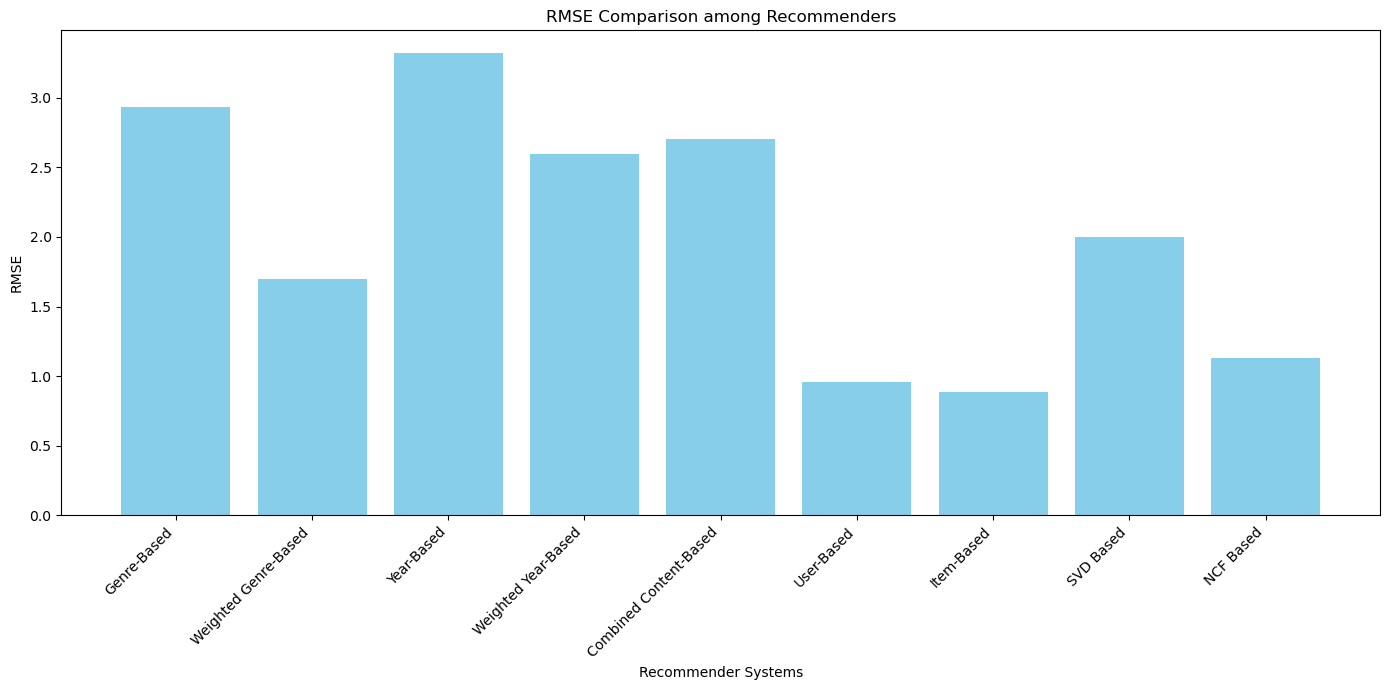

In [381]:
# List of metrics to visualize
metrics_to_plot = ["RMSE", "MAE", "Hit Rate", "Coverage", "Novelty", "Recall@K", "Precision@K"]
plot_metric(data, metrics_to_plot[0])

**Best Performers**: user based and item based have the lowest RMSE, suggesting they are the most accurate in predicting exact ratings.
**Worst Performers**: year-based and metrics_weighted_year_based have the highest RMSE, implying they might not be as accurate in predicting ratings.

***Mean Absolute Error (MAE)***

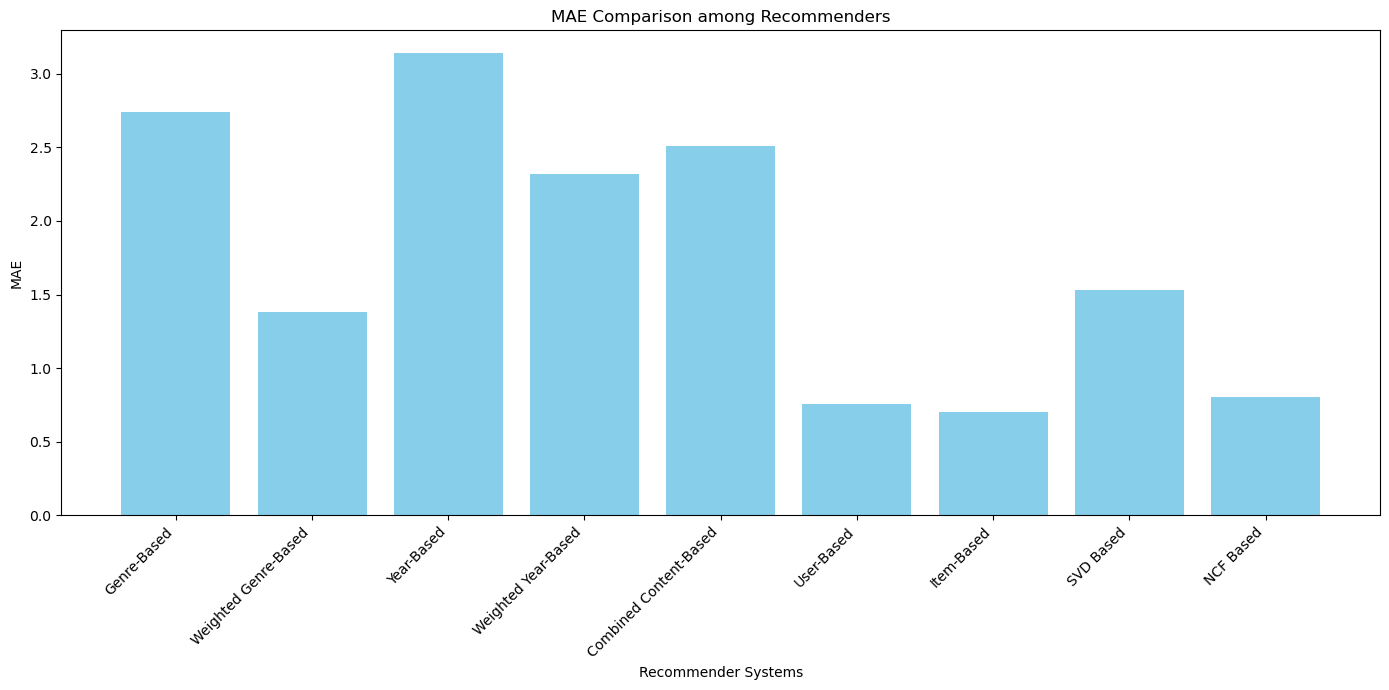

In [382]:
plot_metric(data, metrics_to_plot[1])

***Best Performers***: Again, metrics_user_based and metrics_item_based excel, indicating they are adept at accurately predicting ratings.
***Worst Performers***: year-based has the highest MAE, followed closely by metrics_combined_content_based

***Hit Rate***

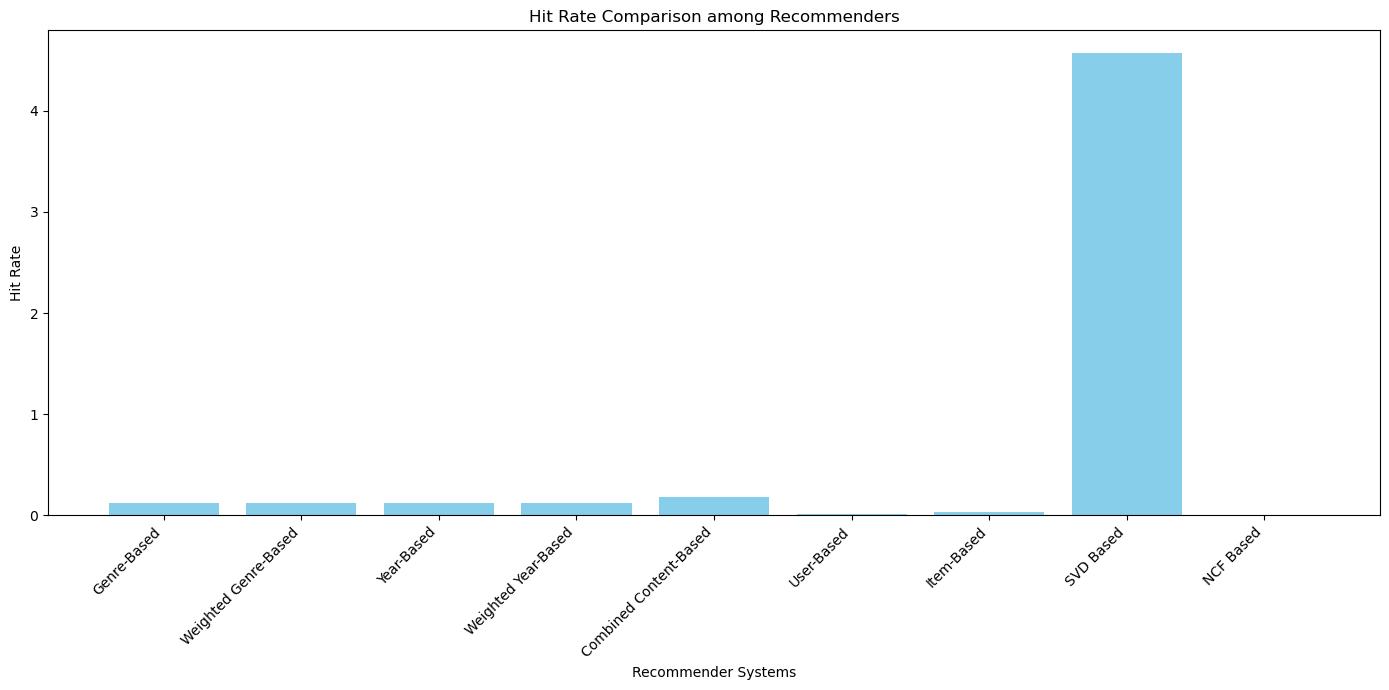

In [383]:
plot_metric(data, metrics_to_plot[2])

***Best Performers***: SVD has an outstandingly high hit rate, implying it's most effective at suggesting movies users will interact with.
***Worst Performers***: NCF model and metrics_user_based have very low hit rates, suggesting users might not find their recommendations as engaging.

***Coverage***

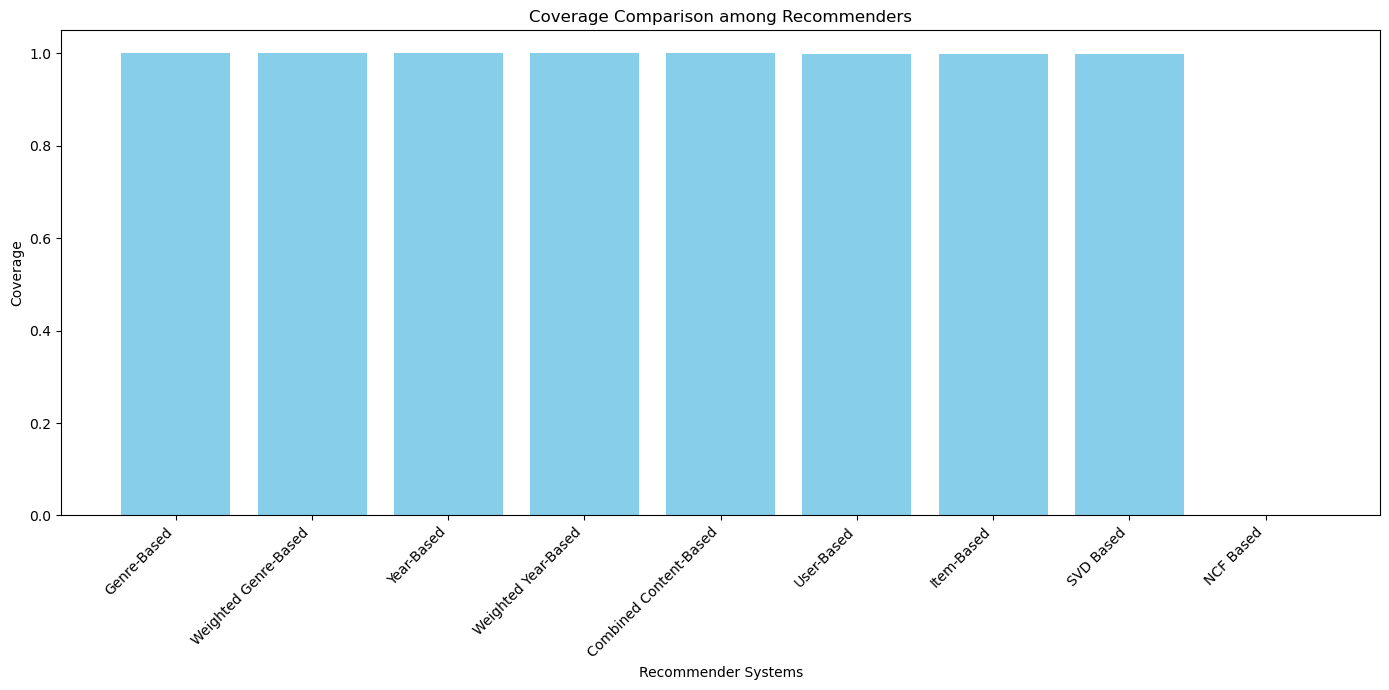

In [384]:
plot_metric(data, metrics_to_plot[3])

***Best Performers***: Almost all recommenders have a coverage of 1.0000 or near to 1.o. This means they can potentially recommend any movie in the dataset
***Worst Performers***: NCF model has an unusually low coverage of 0.0001 or 0.01%. This means it can only recommend a tiny fraction of the available items.

***Novelty***

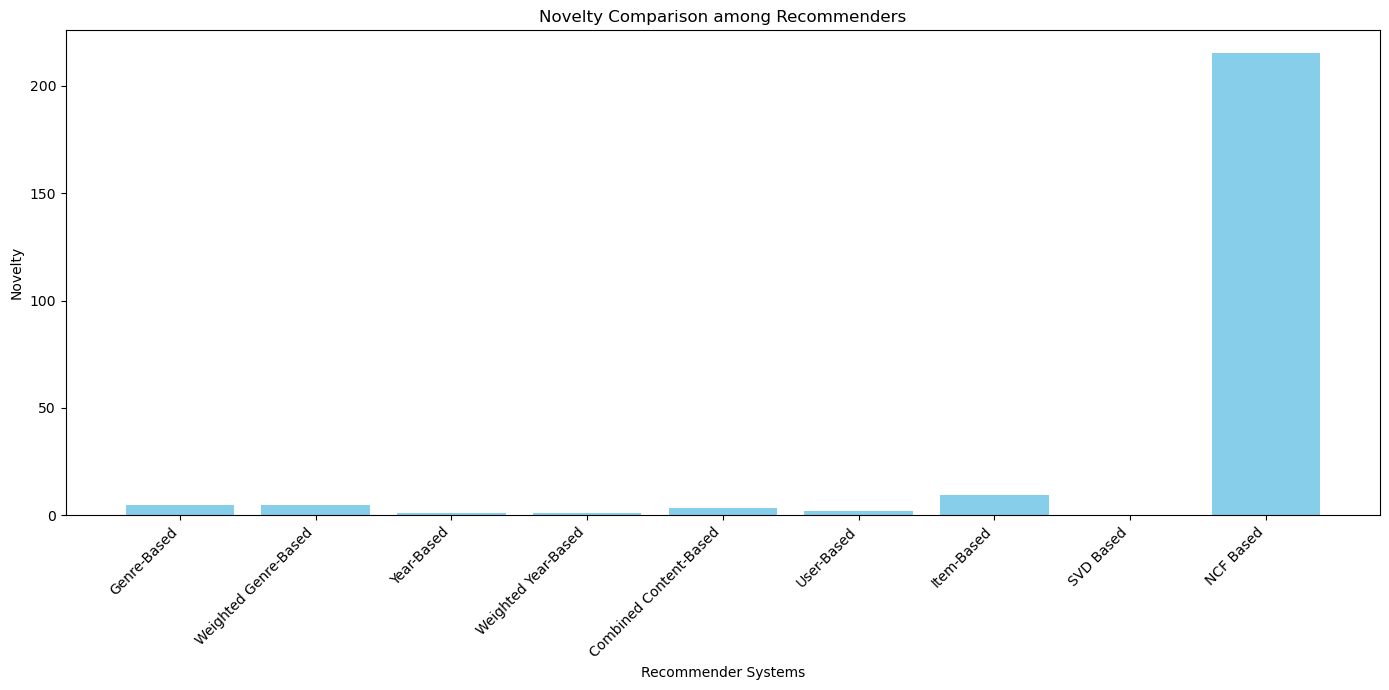

In [385]:
plot_metric(data, metrics_to_plot[4])

***Best Performers*** (Most Novel): The NCF model stands out with an extraordinarily high novelty score, suggesting it recommends less popular items.
***Worst Performers*** (Least Novel): metrics_svd has the lowest novelty, implying it tends to suggest more popular or mainstream movies.

***Recall@k***

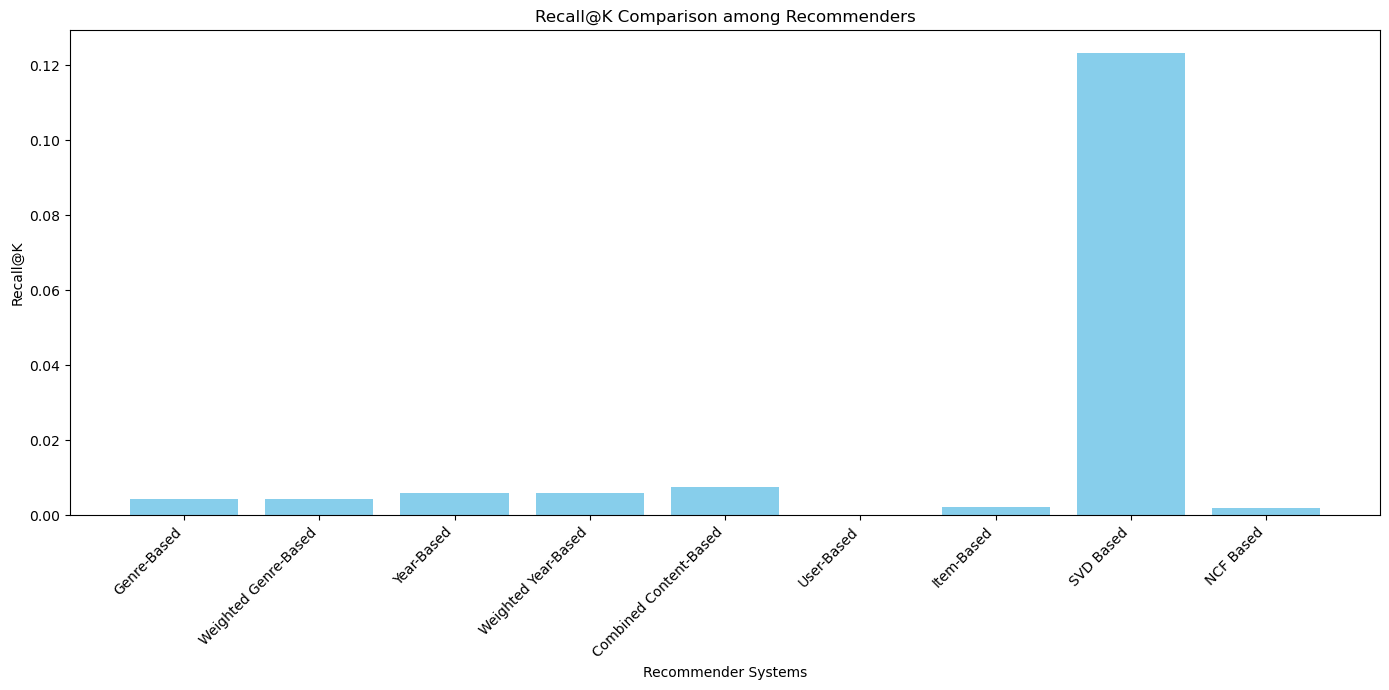

In [386]:
plot_metric(data, metrics_to_plot[5])

***Best Performers***: metrics_svd excels, suggesting it's able to capture most of the items users have interacted with in its top recommendations.
***Worst Performers***: metrics_user_based and NCF model have very low recall, indicating they miss out on many movies users would interact with.

***Precision@k***

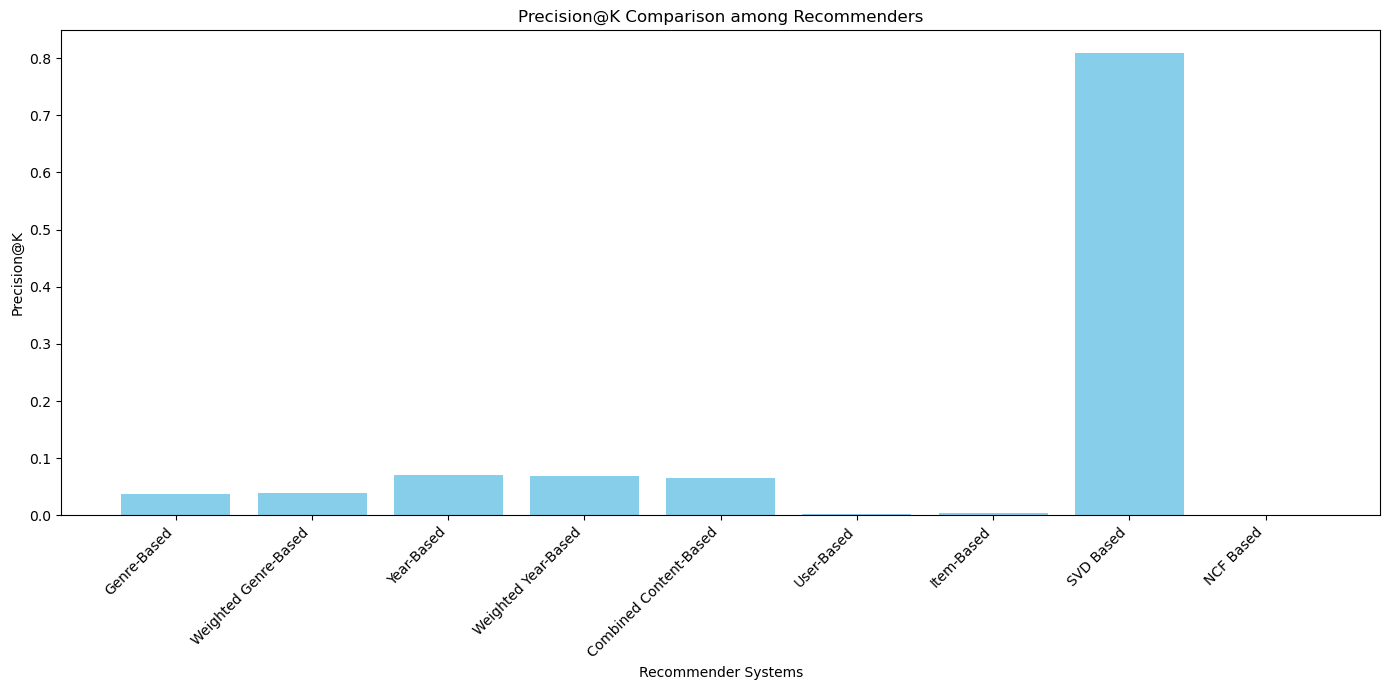

In [387]:
plot_metric(data, metrics_to_plot[6])

**Best Performers**: Again, metrics_svd dominates, implying that a high proportion of its top recommendations are items users have interacted with.
**Worst Performers**: The NCF model has the lowest precision, suggesting its top recommendations are rarely hits with users.